In [1]:
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt

## Cross-Sectional Momentum

In [ ]:
import yfinance as yf
import pandas as pd

# Define ETF ticker symbol
etf_ticker = "IAI"

# Get today's date and calculate date one month ago
today = pd.Timestamp.today()
one_month_ago = today - pd.DateOffset(months=1)

# Download ETF info
etf_data = yf.Ticker(etf_ticker)

In [ ]:
import io
import pandas as pd
tickers = pd.read_csv(io.StringIO('''
SPGI
GS
MS
COIN
SCHW
ICE
MSCI
CME
MCO
RJF
LPLA
CBOE
NDAQ
FDS
TW
IBKR
HOOD
MKTX
MORN
SF
JEF
EVR
HLI
LAZ
MC
BGC
PIPR
PJT
SNEX
VIRT
DFIN
USD
LPRO
XTSLA
RILY
WFFUT
RTYH4
IXAH4
'''), header=None)


In [ ]:
ticker_list = []

for val in tickers[0]:
  ticker_list.append(val)

In [ ]:
all_stock_data = {}

for symbol in ticker_list:
  data = yf.download(symbol, '2014-02-01','2024-02-01')
  data_close = data['Close']
  all_stock_data[symbol] = data_close

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
iai_data = pd.DataFrame(all_stock_data)
iai_data = iai_data.reset_index()

## Backtest Strategies

### Monthly Performance

In [ ]:
## Strategy one: 1 month performance (21 days)
for ticker in ticker_list:
  iai_data[ticker + '_prev_month'] = iai_data[ticker].shift(21)
  iai_data[ticker + '_pct_change'] = (iai_data[ticker + '_prev_month'] - iai_data[ticker]) / iai_data[ticker + '_prev_month']

In [ ]:
iai_data

Date        SPGI          GS         MS        COIN       SCHW  \
0    2014-02-03   74.389999  159.820007  28.950001         NaN  23.650000   
1    2014-02-04   77.019997  161.759995  29.020000         NaN  24.129999   
2    2014-02-05   76.900002  160.419998  29.180000         NaN  23.860001   
3    2014-02-06   77.349998  161.750000  29.690001         NaN  24.440001   
4    2014-02-07   79.970001  161.929993  29.690001         NaN  24.600000   
...         ...         ...         ...        ...         ...        ...   
2511 2024-01-25  449.339996  382.700012  88.019997  121.010002  63.709999   
2512 2024-01-26  446.600006  377.790009  87.730003  125.199997  64.040001   
2513 2024-01-29  449.809998  380.559998  87.620003  132.820007  63.939999   
2514 2024-01-30  454.559998  386.869995  87.620003  130.820007  64.379997   
2515 2024-01-31  448.350006  384.010010  87.239998  128.199997  62.919998   

             ICE        MSCI         CME         MCO  ...  XTSLA_prev_month  \
0      40.689999   41.009998   73.180000   72.650002  ...               NaN   
1      41.773998   41.720001   73.610001   74.870003  ...               NaN   
2      41.512001   41.509998   73.559998   74.550003  ...               NaN   
3      42.084000   40.740002   75.980003   76.769997  ...               NaN   
4      43.105999   40.279999   75.690002   80.019997  ...               NaN   
...          ...         ...         ...         ...  ...               ...   
2511  127.290001  554.770020  205.610001  392.600006  ...               NaN   
2512  127.260002  549.289978  206.779999  389.290009  ...               NaN   
2513  128.179993  550.950012  204.779999  391.269989  ...               NaN   
2514  129.020004  602.239990  206.110001  396.510010  ...               NaN   
2515  127.330002  598.619995  205.839996  392.040009  ...               NaN   

      XTSLA_pct_change  RILY_prev_month  RILY_pct_change  WFFUT_prev_month  \
0                  NaN              NaN              NaN               NaN   
1                  NaN              NaN              NaN               NaN   
2                  NaN              NaN              NaN               NaN   
3                  NaN              NaN              NaN               NaN   
4                  NaN              NaN              NaN               NaN   
...                ...              ...              ...               ...   
2511               NaN        20.110001        -0.008454               NaN   
2512               NaN        19.320000        -0.027950               NaN   
2513               NaN        20.490000        -0.183016               NaN   
2514               NaN        20.709999        -0.225495               NaN   
2515               NaN        20.990000        -0.115769               NaN   

      WFFUT_pct_change  RTYH4_prev_month  RTYH4_pct_change  IXAH4_prev_month  \
0                  NaN               NaN               NaN               NaN   
1                  NaN               NaN               NaN               NaN   
2                  NaN               NaN               NaN               NaN   
3                  NaN               NaN               NaN               NaN   
4                  NaN               NaN               NaN               NaN   
...                ...               ...               ...               ...   
2511               NaN               NaN               NaN               NaN   
2512               NaN               NaN               NaN               NaN   
2513               NaN               NaN               NaN               NaN   
2514               NaN               NaN               NaN               NaN   
2515               NaN               NaN               NaN               NaN   

      IXAH4_pct_change  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
2511               NaN  
2512               NaN  
2513          

In [ ]:
def sort_by_value(item):
    return item[1]

In [ ]:
def get_winners(timestamp):

  # get specific date
  date_df = iai_data[iai_data['Date'] == timestamp]

  date_df = date_df.dropna(axis = 1)

  pattern = r".*pct_change"  # Match any character sequence followed by 'pct_change'
  pct_change_cols = [col for col in date_df.columns if re.search(pattern, col)]
  pct_change_dict = {}

  for col in pct_change_cols:
    pct_change_dict[col] = date_df[col].iloc[0]

  # sort dicitonary
  sorted_pct = sorted(pct_change_dict.items(), key=sort_by_value, reverse = True)

  return sorted_pct


In [ ]:
date_results = {}

for i in range(21, iai_data.shape[0], 21):
  timestamp = iai_data['Date'].iloc[i]
  date_results[timestamp] = get_winners(timestamp)[:5]

In [ ]:
dates = []
purchases = []
values = []

# now, get the results of the purchases
for date, items in date_results.items():
    dates.append(date)
    for purchase, value in items:
        purchases.append(purchase)
        values.append(value)

purchases = [purchase.split("_")[0] for purchase in purchases]

# Create a DataFrame with three columns
picks = pd.DataFrame({
    "Date": dates,
    "purchase1": purchases[::5],
    "purchase2": purchases[1::5],
    "purchase3": purchases[2::5],
    "purchase4": purchases[3::5],
    "purchase5": purchases[4::5],
    "value1": values[::5],
    "value2": values[1::5],
    "value3": values[2::5],
    "value4": values[3::5],
    "value5": values[4::5],
})

In [ ]:
date_list = list(iai_data['Date'])

In [ ]:
picks = picks.iloc[:-1]

In [ ]:
# get the performance of each pick
def get_return(ticker, date):
  date_index = date_list.index(date)
  next_month = date_list[date_index + 21]
  next_month_df = iai_data[iai_data['Date'] == next_month]
  month_return = next_month_df[ticker + '_pct_change'].iloc[0]
  return month_return

In [ ]:
# apply to all purchases
picks['purchase1_return'] = picks.apply(lambda row: get_return(row['purchase1'], row['Date']), axis=1)
picks['purchase2_return'] = picks.apply(lambda row: get_return(row['purchase2'], row['Date']), axis=1)
picks['purchase3_return'] = picks.apply(lambda row: get_return(row['purchase3'], row['Date']), axis=1)
picks['purchase4_return'] = picks.apply(lambda row: get_return(row['purchase4'], row['Date']), axis=1)
picks['purchase5_return'] = picks.apply(lambda row: get_return(row['purchase5'], row['Date']), axis=1)

In [ ]:
def month_ret(ret1, ret2, ret3, ret4, ret5):
  return 1 + sum([ret1, ret2, ret3, ret4, ret5]) / 5

In [ ]:
# calculate total return
picks['month_return'] = picks.apply(lambda row: month_ret(row['purchase1_return'], row['purchase2_return'],
                                                          row['purchase3_return'], row['purchase4_return'],
                                                          row['purchase5_return']), axis = 1)

picks['total_return'] = picks['month_return'].cumprod()

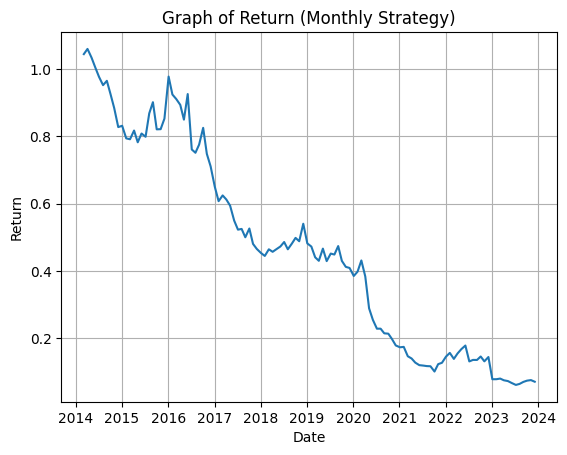

In [ ]:
# plot the return
to_plot = picks.set_index('Date')
plt.plot(to_plot['total_return'])
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Graph of Return (Monthly Strategy)')
plt.grid(True)
plt.show()

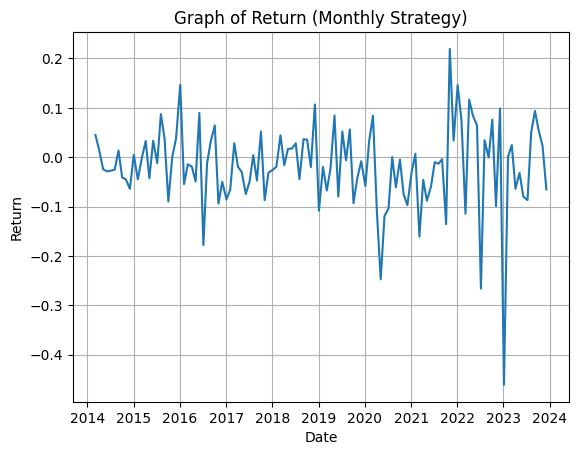

In [ ]:
plt.plot(to_plot['month_return'] - 1)
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Graph of Return (Monthly Strategy)')
plt.grid(True)
plt.show()

In [ ]:
def calculate_sharpe_ratio(returns, risk_free_rate=0):

  # Calculate daily excess return (return - risk-free rate)
  excess_returns = returns - risk_free_rate

  # Calculate annualized standard deviation of excess returns
  annualized_volatility = np.std(excess_returns) * np.sqrt(12)

  # Calculate the Sharpe ratio (assuming daily data)
  sharpe_ratio = np.mean(excess_returns) / annualized_volatility

  return sharpe_ratio


In [ ]:
# Sharpe Ratio
calculate_sharpe_ratio(picks['month_return'])

3.365684390740456

In [ ]:
# Cumulative Return

(picks['total_return'].iloc[-1] - 1) * 100

-93.01923874569005

In [ ]:
# max drawdown
rolling_max = picks['total_return'].cummax()

# Calculate the drawdown by subtracting the cumulative returns from the rolling max
drawdown = rolling_max - picks['total_return']

# Find the maximum drawdown
max_drawdown = drawdown.max()

max_drawdown

1.0001499377478564

In [ ]:
# average win
winners = picks[picks['month_return'] > 1]
(winners['month_return'] - 1).mean() * 100

5.37073395448337

<Axes: >

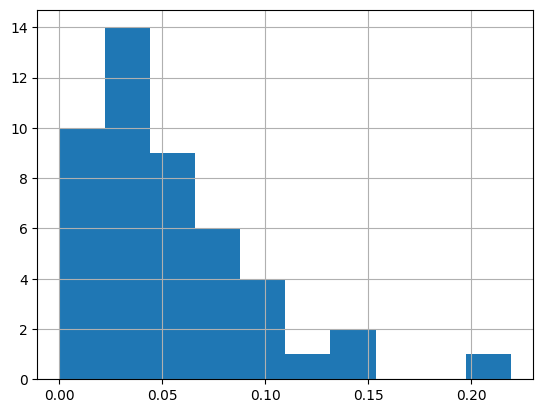

In [ ]:
(winners['month_return'] - 1).hist()

In [ ]:
# average loss
losers = picks[picks['month_return'] < 1]
(losers['month_return'] - 1).mean() * 100

-6.591431516726981

<Axes: >

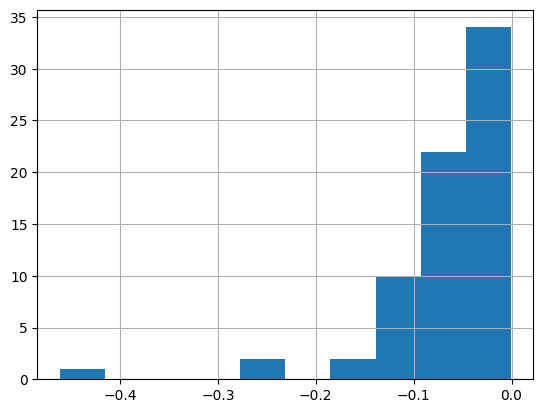

In [ ]:
(losers['month_return'] - 1).hist()

### Daily Performance

In [ ]:
iai_data = pd.DataFrame(all_stock_data)
iai_data = iai_data.reset_index()

In [ ]:
## Strategy two: daily performance
for ticker in ticker_list:
  iai_data[ticker + '_prev_day'] = iai_data[ticker].shift(1)
  iai_data[ticker + '_pct_change'] = (iai_data[ticker + '_prev_day'] - iai_data[ticker]) / iai_data[ticker + '_prev_day']

In [ ]:
def sort_by_value(item):
    return item[1]

In [ ]:
def get_winners(timestamp):

  # get specific date
  date_df = iai_data[iai_data['Date'] == timestamp]

  date_df = date_df.dropna(axis = 1)

  pattern = r".*pct_change"  # Match any character sequence followed by 'pct_change'
  pct_change_cols = [col for col in date_df.columns if re.search(pattern, col)]
  pct_change_dict = {}

  for col in pct_change_cols:
    pct_change_dict[col] = date_df[col].iloc[0]

  # sort dicitonary
  sorted_pct = sorted(pct_change_dict.items(), key=sort_by_value, reverse = True)

  return sorted_pct


In [ ]:
date_results = {}

for i in range(1, iai_data.shape[0], 1):
  timestamp = iai_data['Date'].iloc[i]
  date_results[timestamp] = get_winners(timestamp)[:5]

In [ ]:
dates = []
purchases = []
values = []

# now, get the results of the purchases
for date, items in date_results.items():
    dates.append(date)
    for purchase, value in items:
        purchases.append(purchase)
        values.append(value)

purchases = [purchase.split("_")[0] for purchase in purchases]

# Create a DataFrame with three columns
picks = pd.DataFrame({
    "Date": dates,
    "purchase1": purchases[::5],
    "purchase2": purchases[1::5],
    "purchase3": purchases[2::5],
    "purchase4": purchases[3::5],
    "purchase5": purchases[4::5],
    "value1": values[::5],
    "value2": values[1::5],
    "value3": values[2::5],
    "value4": values[3::5],
    "value5": values[4::5],
})

In [ ]:
date_list = list(iai_data['Date'])

In [ ]:
picks = picks.iloc[:-1]

In [ ]:
# get the performance of each pick
def get_return(ticker, date):
  date_index = date_list.index(date)
  next_day = date_list[date_index + 1]
  next_day_df = iai_data[iai_data['Date'] == next_day]
  day_return = next_day_df[ticker + '_pct_change'].iloc[0]
  return day_return

In [ ]:
# apply to all purchases
picks['purchase1_return'] = picks.apply(lambda row: get_return(row['purchase1'], row['Date']), axis=1)
picks['purchase2_return'] = picks.apply(lambda row: get_return(row['purchase2'], row['Date']), axis=1)
picks['purchase3_return'] = picks.apply(lambda row: get_return(row['purchase3'], row['Date']), axis=1)
picks['purchase4_return'] = picks.apply(lambda row: get_return(row['purchase4'], row['Date']), axis=1)
picks['purchase5_return'] = picks.apply(lambda row: get_return(row['purchase5'], row['Date']), axis=1)

In [ ]:
def month_ret(ret1, ret2, ret3, ret4, ret5):
  return 1 + sum([ret1, ret2, ret3, ret4, ret5]) / 5

In [ ]:
# calculate total return
picks['day_return'] = picks.apply(lambda row: month_ret(row['purchase1_return'], row['purchase2_return'],
                                                          row['purchase3_return'], row['purchase4_return'],
                                                          row['purchase5_return']), axis = 1)

picks['total_return'] = picks['day_return'].cumprod()

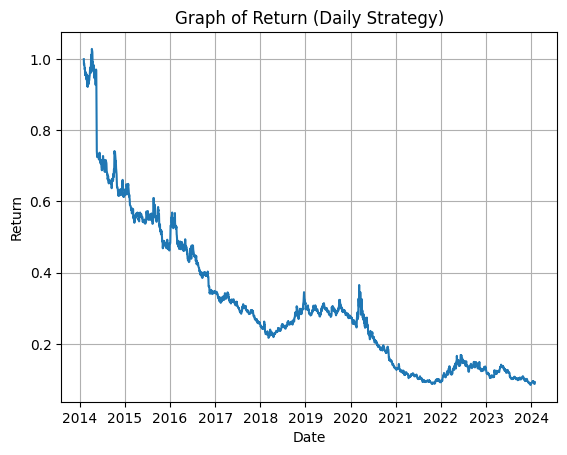

In [ ]:
# plot the return
to_plot = picks.set_index('Date')
plt.plot(to_plot['total_return'])
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Graph of Return (Daily Strategy)')
plt.grid(True)
plt.show()

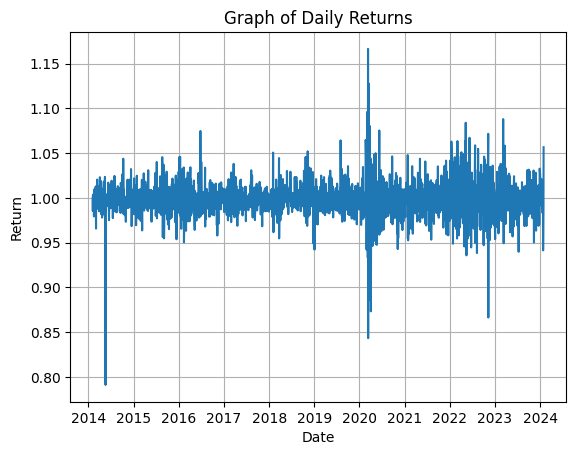

In [ ]:
# plot the return
plt.plot(to_plot['day_return'])
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Graph of Daily Returns')
plt.grid(True)
plt.show()

In [ ]:
def calculate_sharpe_ratio(returns, risk_free_rate=0):

  # Calculate daily excess return (return - risk-free rate)
  excess_returns = returns - risk_free_rate

  # Calculate annualized standard deviation of excess returns
  annualized_volatility = np.std(excess_returns) * np.sqrt(252)

  # Calculate the Sharpe ratio (assuming daily data)
  sharpe_ratio = np.mean(excess_returns) / annualized_volatility

  return sharpe_ratio


In [ ]:
# Sharpe Ratio
calculate_sharpe_ratio(picks['day_return'])

3.2534169026060638

In [ ]:
# Cumulative Return
(picks['total_return'].iloc[-1] - 1) * 100

-90.68826264471906

In [ ]:
# max drawdown
rolling_max = picks['total_return'].cummax()

# Calculate the drawdown by subtracting the cumulative returns from the rolling max
drawdown = rolling_max - picks['total_return']

# Find the maximum drawdown
max_drawdown = drawdown.max()

max_drawdown

0.942612612621316

In [ ]:
# average win
winners = picks[picks['day_return'] > 1]
(winners['day_return'] - 1).mean() * 100

1.275633418279707

<Axes: >

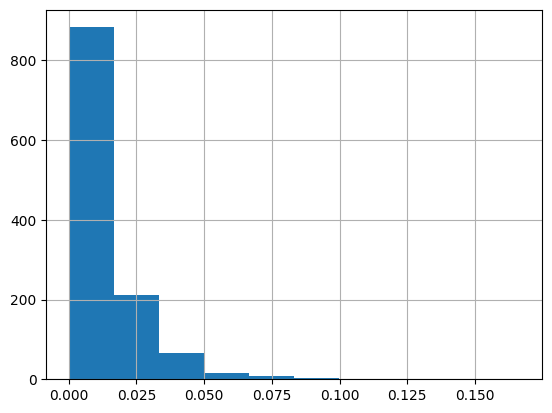

In [ ]:
(winners['day_return'] - 1).hist()

In [ ]:
# average loss
losers = picks[picks['day_return'] < 1]
(losers['day_return'] - 1).mean() * 100

-1.2859783352121834

<Axes: >

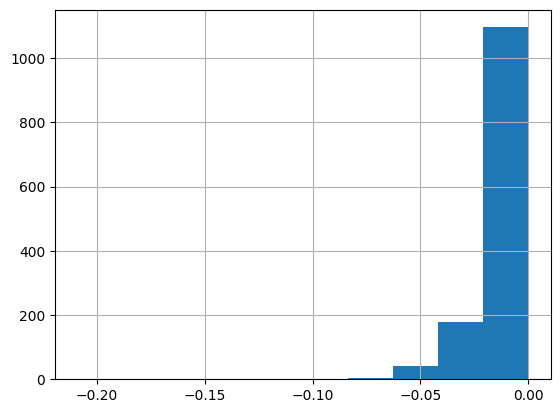

In [ ]:
(losers['day_return'] - 1).hist()

# Autocorrelation

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Stocks: AAPL, MSFT, AMZN, KO, XOM, BA, PG, UNH, JPM, NVDA
AAPL = yf.download('AAPL', '2004-03-01', '2024-03-01')['Adj Close']
MSFT = yf.download('MSFT', '2004-03-01', '2024-03-01')['Adj Close']
AMZN = yf.download('AMZN', '2004-03-01', '2024-03-01')['Adj Close']
KO = yf.download('KO', '2004-03-01', '2024-03-01')['Adj Close']
XOM = yf.download('XOM', '2004-03-01', '2024-03-01')['Adj Close']
BA = yf.download('BA', '2004-03-01', '2024-03-01')['Adj Close']
PG = yf.download('PG', '2004-03-01', '2024-03-01')['Adj Close']
UNH = yf.download('UNH', '2004-03-01', '2024-03-01')['Adj Close']
JPM = yf.download('JPM', '2004-03-01', '2024-03-01')['Adj Close']
NVDA = yf.download('NVDA', '2004-03-01', '2024-03-01')['Adj Close']

tickers = [AAPL, MSFT, AMZN, KO, XOM, BA, PG, UNH, JPM, NVDA]
tickers_str = ["AAPL", "MSFT", "AMZN", "KO", "XOM", "BA", "PG", "UNH", "JPM", "NVDA"]

data_dict = {}

for i in range(len(tickers_str)):
    data_dict[tickers_str[i]] = tickers[i]

data = pd.DataFrame(data_dict)

for ticker in tickers_str:
    data[ticker + "_lag1"] = data[ticker].shift(1)
    data[ticker + '_daily_return'] = data[ticker] - data[ticker + '_lag1']

    data[ticker + "_lag5"] = data[ticker].shift(5)
    data[ticker + '_weekly_return'] = data[ticker] - data[ticker + '_lag5']

    data[ticker + "_lag21"] = data[ticker].shift(21)
    data[ticker + '_monthly_return'] = data[ticker] - data[ticker + '_lag21']

    data[ticker + "_lag252"] = data[ticker].shift(252)
    data[ticker + '_yearly_return'] = data[ticker] - data[ticker + '_lag252']

daily_dict = {}
weekly_dict = {}
monthly_dict = {}
yearly_dict = {}

for ticker in tickers_str:
    daily_dict[ticker + "_daily"] = data[ticker + '_daily_return']
    weekly_dict[ticker + "_weekly"] = data[ticker + '_weekly_return']
    monthly_dict[ticker + "_monthly"] = data[ticker + '_monthly_return']
    yearly_dict[ticker + "_yearly"] = data[ticker + '_yearly_return']

daily_returns = pd.DataFrame(daily_dict)
weekly_returns = pd.DataFrame(weekly_dict)
monthly_returns = pd.DataFrame(monthly_dict)
yearly_returns = pd.DataFrame(yearly_dict)

daily_returns.dropna(inplace=True)
weekly_returns.dropna(inplace=True)
monthly_returns.dropna(inplace=True)
yearly_returns.dropna(inplace=True)


daily_plot = daily_returns.plot(title="Daily Returns", figsize=(20, 20))
weekly_plot = weekly_returns.plot(title="Weekly Returns", figsize=(20, 20))
monthly_plot = monthly_returns.plot(title="Monthly Returns", figsize=(20, 20))
yearly_plot = yearly_returns.plot(title="Yearly Returns", figsize=(20, 20))


for ticker in tickers_str:
    plot_acf(daily_returns[ticker + "_daily"], lags=90, title=ticker + " Autocorrelation")
    plt.show()

for ticker in tickers_str:
    plot_acf(weekly_returns[ticker + "_weekly"], lags=90, title=ticker + " Autocorrelation")
    plt.show()

for ticker in tickers_str:
    plot_acf(monthly_returns[ticker + "_monthly"], lags=90, title=ticker + " Autocorrelation")
    plt.show()

for ticker in tickers_str:
    plot_acf(yearly_returns[ticker + "_yearly"], lags=90, title=ticker + " Autocorrelation")
    plt.show()







# Time Series Momentum Strategies

In [3]:
nvda = yf.download('NVDA','2009-03-01','2024-03-01')
msft = yf.download('MSFT','2009-03-01','2024-03-01')
nvda_price = nvda['Adj Close']
msft_price = msft['Adj Close']

nvda_price

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Date
2009-03-02      1.738287
2009-03-03      1.807085
2009-03-04      1.940094
2009-03-05      1.894229
2009-03-06      1.924041
                 ...    
2024-02-23    788.132996
2024-02-26    790.882874
2024-02-27    786.973083
2024-02-28    776.593567
2024-02-29    791.082886
Name: Adj Close, Length: 3776, dtype: float64

# 1 SMA Crossover

In [ ]:
sma8 = [0 for _ in range(8)]
for i in range(8, len(nvda_price)):
  sma8.append(sum(nvda_price[i-8:i])/8)

In [ ]:
long_pos = False
short_pos = False
long_position = ['None' for _ in range(len(nvda_price))]
short_position = ['None' for _ in range(len(nvda_price))]
for i in range(8, len(nvda_price)):
  if nvda_price[i] > sma8[i]:
    if not long_pos:
      long_pos = True
      long_position[i] = 'EnterLong'
    if short_pos:
      short_pos = False
      short_position[i] = 'CloseShort'
  else:
    if long_pos:
      long_pos = False
      long_position[i] = 'CloseLong'
    if not short_pos:
      short_pos = True
      short_position[i] = 'EnterShort'
# position

In [ ]:
short_start = 0
long_start = 0
long_returns, short_returns = 0, 0
cnt1, cnt2 = 0, 0
for i in range(len(long_position)):
  if short_position[i] == 'EnterShort':
    short_start = nvda_price[i]
  if short_position[i] == 'CloseShort':
    short_returns += short_start - nvda_price[i]

  if long_position[i] == 'EnterLong':
    long_start = nvda_price[i]
  if long_position[i] == 'CloseLong':
    long_returns += nvda_price[i] - long_start
print(short_returns, long_returns)

-158.1244306564331 624.9598529338837


# 2 Moving Average Cross Over

In [ ]:
sma21 = [0 for _ in range(21)]
for i in range(21, len(nvda_price)):
  sma21.append(sum(nvda_price[i-21:i])/21)

In [ ]:
long_pos = False
short_pos = False
long_position2 = [None for _ in range(len(nvda_price))]
short_position2 = [None for _ in range(len(nvda_price))]
for i in range(21, len(nvda_price)):
  if sma8[i] > sma21[i]:
    if not long_pos:
      long_pos = True
      long_position2[i] = 'EnterLong'
    if short_pos:
      short_pos = False
      short_position2[i] = 'CloseShort'
  else:
    if long_pos:
      long_pos = False
      long_position2[i] = 'CloseLong'
    if not short_pos:
      short_pos = True
      short_position2[i] = 'EnterShort'

In [ ]:
short_start = 0
long_start = 0
long_returns2, short_returns2 = [], []
long_returns2_percent, short_returns2_percent = 1, 1
short_returns2_val, long_returns2_val = [], []
cnt1, cnt2 = 0, 0
for i in range(len(long_position2)):
  if short_position2[i] == 'EnterShort':
    short_start = nvda_price[i]
  if short_position2[i] == 'CloseShort':
    short_returns2_val.append(short_start - nvda_price[i])

    percent_return = (short_start - nvda_price[i])/short_start
    short_returns2.append(percent_return)
    short_returns2_percent *= (1+percent_return)

  if long_position2[i] == 'EnterLong':
    long_start = nvda_price[i]
  if long_position2[i] == 'CloseLong':
    long_returns2_val.append(nvda_price[i] - long_start)

    percent_return = (nvda_price[i] - long_start)/long_start
    long_returns2.append(percent_return)
    long_returns2_percent *= (1+percent_return)
print(short_returns2_percent*long_returns2_percent, short_returns2_percent, long_returns2_percent)

print('Short:')
print('Mean: ', np.mean(short_returns2), ' St Deviation: ', np.std(short_returns2))
print('Value: ', sum(short_returns2_val))
print()
print('Long:')
print(sum(long_returns2), np.mean(long_returns2), np.std(long_returns2))
print('Value: ', sum(long_returns2_val))

total_returns2 = [num for num in short_returns2]
total_returns2.extend([num for num in long_returns2])

cum_return = 1
cum_returns = []
for num in total_returns2:
  cum_return *= (1+num)
  cum_returns.append(cum_return)

mean_total_returns2, std_total_returns2 = np.mean(total_returns2), np.std(total_returns2)
risk_free_rate = 0.04
sharpe_ratio = (mean_total_returns2-risk_free_rate)/std_total_returns2

#print(mean_total_returns2, std_total_returns2)
print()
print('Sharpe Ratio: ', sharpe_ratio)
print('Cumulative Return: ', cum_return)
print('Buy and Hold Return: ', (nvda_price[-1]-nvda_price[0])/nvda_price[0])

pos_returns2 = [num for num in total_returns2 if num>0]
neg_returns2 = [num for num in total_returns2 if num<0]
print('Average Win: ', np.mean(pos_returns2))
print('Average Loss: ', np.mean(neg_returns2))

6.138728374862121 0.08680894969241394 70.71538587453469
Short:
Mean:  -0.02133417800851317  St Deviation:  0.09183213981979482
Value:  -116.80901312828064

Long:
5.5692593961899135 0.058623783117788555 0.1744397561186603
Value:  669.0628328323364

Sharpe Ratio:  -0.1456016333998093
Cumulative Return:  6.138728374862118
Buy and Hold Return:  454.09328189756405
Average Win:  0.11600074952489024
Average Loss:  -0.07726551359947376


[94, 7] [0.0769482823503245, 1.0299260977946807]
-0.925287569161429


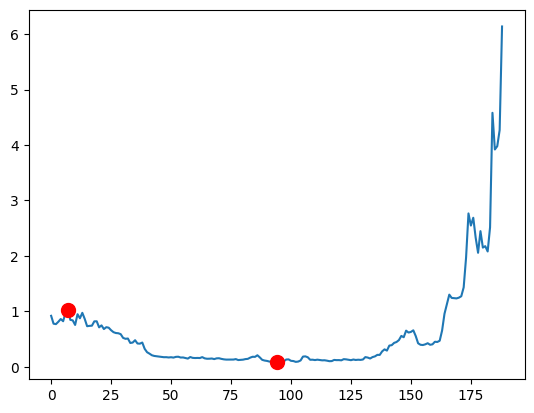

In [ ]:
i = np.argmax(np.maximum.accumulate(cum_returns) - cum_returns) # end of the period
j = np.argmax(cum_returns[:i]) # start of period

print([i, j], [cum_returns[i], cum_returns[j]])
print((cum_returns[i]-cum_returns[j])/cum_returns[j])
plt.plot(cum_returns)
plt.plot([i, j], [cum_returns[i], cum_returns[j]], 'o', color='Red', markersize=10)

[74, 11] [-163.33893966674805, 0.23302078247070312]
-701.9629696324794


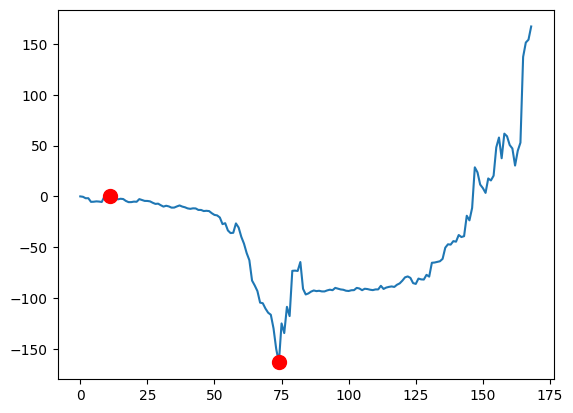

In [ ]:
i = np.argmax(np.maximum.accumulate(fund) - fund) # end of the period
j = np.argmax(fund[:i]) # start of period

print([i, j], [fund[i], fund[j]])
print((fund[i]-fund[j])/fund[j])
plt.plot(fund)
plt.plot([i, j], [fund[i], fund[j]], 'o', color='Red', markersize=10)

-0.16282153129577637 0.28894948959350586
0.435718297958374 -1.3583948612213135
-0.7462947368621826 8.394584894180298
Max Drawdown:  -12.248350657644416


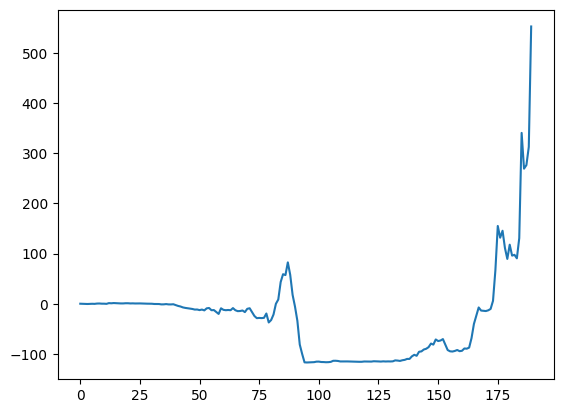

In [ ]:
peak, trough = 0, 0
peak_found, trough_found = False, False
max_drawdown = 0

returns_val = [num for num in short_returns2_val]
returns_val.extend([num for num in long_returns2_val])

fund = [0]
for i in range(len(returns_val)):
  fund.append(returns_val[i]+fund[-1])

for i in range(1, len(fund)):
  if fund[i]<fund[i-1]:
    if peak == 0:
      peak = fund[i-1]

  if fund[i]>fund[i-1]:
    if peak != 0:
      #print((peak-nvda_price[i-1])/peak)

      trough = fund[i-1]
      if (peak-trough)/peak > max_drawdown:
        print(peak, trough)
        max_drawdown = (peak-fund[i-1])/peak
        peak = 0
print('Max Drawdown: ', -1*max_drawdown)
plt.plot(fund)

In [ ]:
def max_drawdown(short_returns_val, long_returns_val):
  peak, trough = 0, 0
  peak_found, trough_found = False, False
  drawdown = 0

  returns_val = [num for num in short_returns_val]
  returns_val.extend([num for num in long_returns_val])

  fund = [0]
  for i in range(len(returns_val)):
    fund.append(returns_val[i]+fund[-1])

  for i in range(1, len(fund)):
    if fund[i]<fund[i-1]:
      if peak == 0:
        peak = fund[i-1]

    if fund[i]>fund[i-1]:
      if peak != 0:
        #print((peak-nvda_price[i-1])/peak)
        drawdown = max(drawdown, (peak-fund[i-1])/peak)
        peak = 0
  return drawdown
print('Max Drawdown: ', -1*max_drawdown(short_returns2_val, long_returns2_val))

TypeError: 'numpy.float64' object is not iterable

# 2 EMA Crossover

In [ ]:
ema8 = [sma8[i] for i in range(8)]
smoothing = 2/(1+8)
for i in range(8, len(nvda_price)):
  ema8.append((nvda_price[i]*smoothing) + (ema8[i-1]*(1-smoothing)))

In [ ]:
ema21 = [sma21[i] for i in range(21)]
smoothing = 2/(1+21)
for i in range(21, len(nvda_price)):
  ema21.append((nvda_price[i]*smoothing) + (ema21[i-1]*(1-smoothing)))

In [ ]:
# temp_df = pd.DataFrame({'B': nvda_price})
# ema8_2 = temp_df.ewm(alpha=smoothing).mean()
# ema8_2['B']

Date
2009-03-02      1.738287
2009-03-03      1.774324
2009-03-04      1.834923
2009-03-05      1.851931
2009-03-06      1.869224
                 ...    
2024-02-23    689.945426
2024-02-26    699.121557
2024-02-27    707.108060
2024-02-28    713.424924
2024-02-29    720.484739
Name: B, Length: 3776, dtype: float64

In [ ]:
long_pos = False
short_pos = False
long_position3 = [None for _ in range(len(nvda_price))]
short_position3 = [None for _ in range(len(nvda_price))]
for i in range(21, len(nvda_price)):
  if ema8[i] > ema21[i]:
    if not long_pos:
      long_pos = True
      long_position3[i] = 'EnterLong'
    if short_pos:
      short_pos = False
      short_position3[i] = 'CloseShort'
  else:
    if long_pos:
      long_pos = False
      long_position3[i] = 'CloseLong'
    if not short_pos:
      short_pos = True
      short_position3[i] = 'EnterShort'

In [ ]:
short_start = 0
long_start = 0
long_returns3, short_returns3 = [], []
cnt1, cnt2 = 0, 0
for i in range(len(long_position3)):
  if short_position3[i] == 'EnterShort':
    short_start = nvda_price[i]
  if short_position3[i] == 'CloseShort':
    short_returns3.append(short_start - nvda_price[i])

  if long_position3[i] == 'EnterLong':
    long_start = nvda_price[i]
  if long_position3[i] == 'CloseLong':
    long_returns3.append(nvda_price[i] - long_start)
print('Short:')
print(sum(short_returns3), np.mean(short_returns3), np.std(short_returns3))
print('Long:')
print(sum(long_returns3), np.mean(long_returns3), np.std(long_returns3))

total_returns3 = [num for num in short_returns3]
total_returns3.extend([num for num in long_returns3])
print('Total:')
print(sum(total_returns3), np.mean(total_returns3), np.std(total_returns3))

Short:
-149.18727147579193 -1.77603894614038 11.513261262946369
Long:
325.0992156267166 3.870228757460912 30.808568335644168
Total:
175.91194415092468 1.0470949056602659 23.427155581624536


In [ ]:
data = {'Nvidia': nvda_price, 'SMA8': sma8, 'SMA21': sma21, 'EMA8': ema8, 'EMA21': ema21, '1_Long': long_position, '1_Short': short_position}

df = pd.DataFrame(data)
df

Nvidia        SMA8       SMA21        EMA8       EMA21 1_Long  \
Date                                                                            
2009-03-02    1.738287    0.000000    0.000000    0.000000    0.000000   None   
2009-03-03    1.807085    0.000000    0.000000    0.000000    0.000000   None   
2009-03-04    1.940094    0.000000    0.000000    0.000000    0.000000   None   
2009-03-05    1.894229    0.000000    0.000000    0.000000    0.000000   None   
2009-03-06    1.924041    0.000000    0.000000    0.000000    0.000000   None   
...                ...         ...         ...         ...         ...    ...   
2024-02-23  788.132996  723.727303  680.158572  735.500995  689.945426   None   
2024-02-26  790.882874  731.938164  688.470087  747.808079  699.121557   None   
2024-02-27  786.973083  740.642746  696.791126  756.511414  707.108060   None   
2024-02-28  776.593567  746.643715  705.205017  760.974114  713.424924   None   
2024-02-29  791.082886  752.899666  712.441819  767.664952  720.484739   None   

           1_Short  
Date                
2009-03-02    None  
2009-03-03    None  
2009-03-04    None  
2009-03-05    None  
2009-03-06    None  
...            ...  
2024-02-23    None  
2024-02-26    None  
2024-02-27    None  
2024-02-28    None  
2024-02-29    None  

[3776 rows x 7 columns]

In [ ]:
last100 = df.tail(500)
last100

Nvidia        SMA8       SMA21        EMA8       EMA21  \
Date                                                                     
2022-03-04  229.072403  236.520399  244.761007  236.982031  242.151509   
2022-03-07  213.252228  235.958588  243.666336  231.708742  239.524302   
2022-03-08  214.870193  234.671217  242.433636  227.966842  237.283019   
2022-03-09  229.851379  231.887268  241.101567  228.385628  236.607416   
2022-03-10  226.295898  230.465443  240.288403  227.921244  235.670005   
...                ...         ...         ...         ...         ...   
2024-02-23  788.132996  723.727303  680.158572  735.500995  689.945426   
2024-02-26  790.882874  731.938164  688.470087  747.808079  699.121557   
2024-02-27  786.973083  740.642746  696.791126  756.511414  707.108060   
2024-02-28  776.593567  746.643715  705.205017  760.974114  713.424924   
2024-02-29  791.082886  752.899666  712.441819  767.664952  720.484739   

               1_Long     1_Short  
Date                               
2022-03-04  CloseLong  EnterShort  
2022-03-07       None        None  
2022-03-08       None        None  
2022-03-09       None        None  
2022-03-10       None        None  
...               ...         ...  
2024-02-23       None        None  
2024-02-26       None        None  
2024-02-27       None        None  
2024-02-28       None        None  
2024-02-29       None        None  

[500 rows x 7 columns]

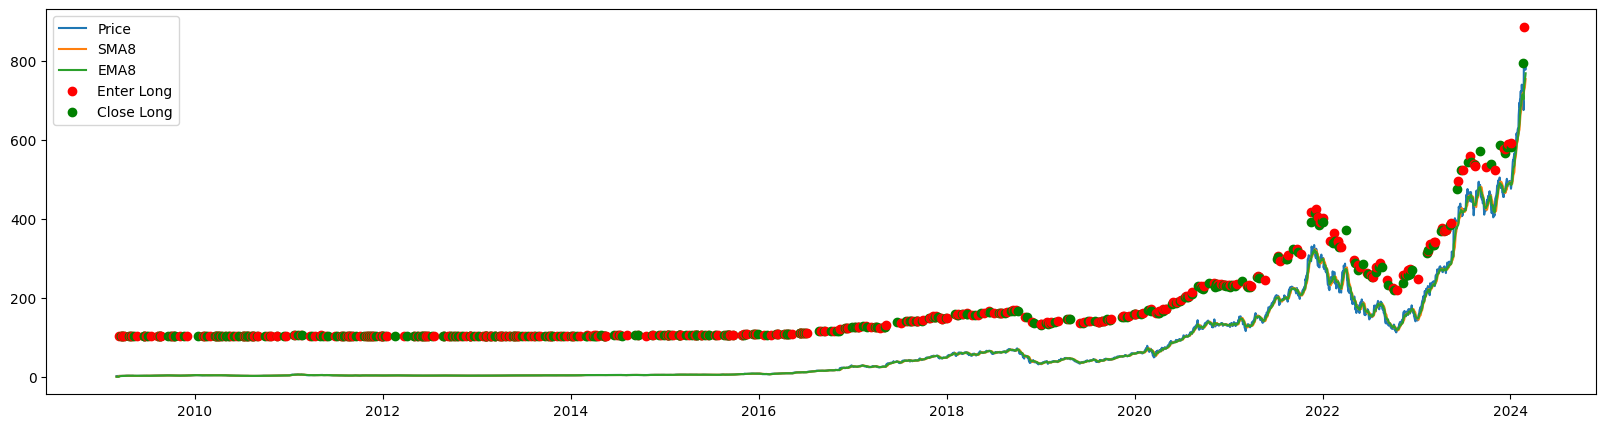

In [ ]:
plt.figure(figsize=(20,5))

last100 = df
plt.plot(last100.index, last100['Nvidia'], label='Price')
plt.plot(last100.index, last100['SMA8'], label='SMA8')
plt.plot(last100.index, last100['EMA8'], label='EMA8')
first_enter, first_close = True, True
for index, row in last100.iterrows():
  if row['1_Long'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Nvidia']+100, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Nvidia']+100, 'ro')

  if row['1_Long'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Nvidia']+100, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Nvidia']+100, 'go')
plt.legend()

# MSFT

In [23]:
def strategies(price):
  sma8 = [0 for _ in range(8)]
  for i in range(8, len(price)):
    sma8.append(sum(price[i-8:i])/8)

  # Strategy #1
  long_pos = False
  short_pos = False
  long_position1 = ['None' for _ in range(len(price))]
  short_position1 = ['None' for _ in range(len(price))]
  for i in range(8, len(price)):
    if price[i] > sma8[i]:
      if not long_pos:
        long_pos = True
        long_position1[i] = 'EnterLong'
      if short_pos:
        short_pos = False
        short_position1[i] = 'CloseShort'
    else:
      if long_pos:
        long_pos = False
        long_position1[i] = 'CloseLong'
      if not short_pos:
        short_pos = True
        short_position1[i] = 'EnterShort'

  short_start = 0
  long_start = 0
  long_returns1, short_returns1 = [], []
  long_returns1_percent, short_returns1_percent = 1, 1
  short_returns1_val, long_returns1_val = [], []
  cnt1, cnt2 = 0, 0
  for i in range(len(long_position1)):
    if short_position1[i] == 'EnterShort':
      short_start = price[i]
    if short_position1[i] == 'CloseShort':
      short_returns1_val.append(short_start - price[i])

      percent_return = (short_start - price[i])/short_start
      short_returns1.append(percent_return)
      short_returns1_percent *= (1+percent_return)

    if long_position1[i] == 'EnterLong':
      long_start = price[i]
    if long_position1[i] == 'CloseLong':
      long_returns1_val.append(price[i] - long_start)

      percent_return = (price[i] - long_start)/long_start
      long_returns1.append(percent_return)
      long_returns1_percent *= (1+percent_return)

  print()
  print('Strategy #1')
  # print('Short:')
  # print('Mean: ', np.mean(short_returns1), ' St Deviation: ', np.std(short_returns1))
  # print()
  # print('Long:')
  # print('Mean: ', np.mean(long_returns1), ' St Deviation: ', np.std(long_returns1))

  total_returns1 = [num for num in short_returns1]
  total_returns1.extend([num for num in long_returns1])

  cum_return = 1
  cum_returns = []
  for num in total_returns1:
    cum_return *= (1+num)
    cum_returns.append(cum_return)

  mean_total_returns1, std_total_returns1 = np.mean(total_returns1), np.std(total_returns1)
  risk_free_rate = 0.04
  sharpe_ratio = (mean_total_returns1-risk_free_rate)/std_total_returns1

  print()
  print('Sharpe Ratio: ', sharpe_ratio)
  print('Cumulative Return: ', cum_return)
  print('Buy and Hold Return: ', (price[-1]-price[0])/price[0])

  pos_returns1 = [num for num in total_returns1 if num>0]
  neg_returns1 = [num for num in total_returns1 if num<0]
  print('Average Win: ', np.mean(pos_returns1))
  print('Average Loss: ', np.mean(neg_returns1))

  i = np.argmax(np.maximum.accumulate(cum_returns) - cum_returns) # end of the period
  j = np.argmax(cum_returns[:i]) # start of period

  print('Max Drawdown: ', (cum_returns[i]-cum_returns[j])/cum_returns[j])

  # ===============================
  # Strategy #2
  # SMA21
  sma21 = [0 for _ in range(21)]
  for i in range(21, len(price)):
    sma21.append(sum(price[i-21:i])/21)

  long_pos = False
  short_pos = False
  long_position2 = [None for _ in range(len(price))]
  short_position2 = [None for _ in range(len(price))]
  for i in range(21, len(price)):
    if sma8[i] > sma21[i]:
      if not long_pos:
        long_pos = True
        long_position2[i] = 'EnterLong'
      if short_pos:
        short_pos = False
        short_position2[i] = 'CloseShort'
    else:
      if long_pos:
        long_pos = False
        long_position2[i] = 'CloseLong'
      if not short_pos:
        short_pos = True
        short_position2[i] = 'EnterShort'

  short_start = 0
  long_start = 0
  long_returns2, short_returns2 = [], []
  long_returns2_percent, short_returns2_percent = 1, 1
  short_returns2_val, long_returns2_val = [], []
  cnt1, cnt2 = 0, 0
  for i in range(len(long_position2)):
    if short_position2[i] == 'EnterShort':
      short_start = price[i]
    if short_position2[i] == 'CloseShort':
      short_returns2_val.append(short_start - price[i])

      percent_return = (short_start - price[i])/short_start
      short_returns2.append(percent_return)
      short_returns2_percent *= (1+percent_return)

    if long_position2[i] == 'EnterLong':
      long_start = price[i]
    if long_position2[i] == 'CloseLong':
      long_returns2_val.append(price[i] - long_start)

      percent_return = (price[i] - long_start)/long_start
      long_returns2.append(percent_return)
      long_returns2_percent *= (1+percent_return)

  print()
  print('Strategy #2')
  # print('Short:')
  # print('Mean: ', np.mean(short_returns2), ' St Deviation: ', np.std(short_returns2))
  # print()
  # print('Long:')
  # print('Mean: ', np.mean(long_returns2), ' St Deviation: ', np.std(long_returns2))

  total_returns2 = [num for num in short_returns2]
  total_returns2.extend([num for num in long_returns2])

  cum_return = 1
  cum_returns = []
  for num in total_returns2:
    cum_return *= (1+num)
    cum_returns.append(cum_return)

  mean_total_returns2, std_total_returns2 = np.mean(total_returns2), np.std(total_returns2)
  risk_free_rate = 0.04
  sharpe_ratio = (mean_total_returns2-risk_free_rate)/std_total_returns2

  print()
  print('Sharpe Ratio: ', sharpe_ratio)
  print('Cumulative Return: ', cum_return)
  print('Buy and Hold Return: ', (price[-1]-price[0])/price[0])

  pos_returns2 = [num for num in total_returns2 if num>0]
  neg_returns2 = [num for num in total_returns2 if num<0]
  print('Average Win: ', np.mean(pos_returns2))
  print('Average Loss: ', np.mean(neg_returns2))

  i = np.argmax(np.maximum.accumulate(cum_returns) - cum_returns) # end of the period
  j = np.argmax(cum_returns[:i]) # start of period

  print('Max Drawdown: ', (cum_returns[i]-cum_returns[j])/cum_returns[j])

  # ===============================
  # Strategy #3
  # EMA8
  ema8 = [sma8[i] for i in range(8)]
  smoothing = 2/(1+8)
  for i in range(8, len(price)):
    ema8.append((price[i]*smoothing) + (ema8[i-1]*(1-smoothing)))

  # EMA21
  ema21 = [sma21[i] for i in range(21)]
  smoothing = 2/(1+21)
  for i in range(21, len(price)):
    ema21.append((price[i]*smoothing) + (ema21[i-1]*(1-smoothing)))

  long_pos = False
  short_pos = False
  long_position3 = [None for _ in range(len(price))]
  short_position3 = [None for _ in range(len(price))]
  for i in range(21, len(price)):
    if ema8[i] > ema21[i]:
      if not long_pos:
        long_pos = True
        long_position3[i] = 'EnterLong'
      if short_pos:
        short_pos = False
        short_position3[i] = 'CloseShort'
    else:
      if long_pos:
        long_pos = False
        long_position3[i] = 'CloseLong'
      if not short_pos:
        short_pos = True
        short_position3[i] = 'EnterShort'

  short_start = 0
  long_start = 0
  long_returns3, short_returns3 = [], []
  long_returns3_percent, short_returns3_percent = 1, 1
  short_returns3_val, long_returns3_val = [], []
  cnt1, cnt2 = 0, 0
  for i in range(len(long_position3)):
    if short_position3[i] == 'EnterShort':
      short_start = price[i]
    if short_position3[i] == 'CloseShort':
      short_returns3_val.append(short_start - price[i])

      percent_return = (short_start - price[i])/short_start
      short_returns3.append(percent_return)
      short_returns3_percent *= (1+percent_return)

    if long_position3[i] == 'EnterLong':
      long_start = price[i]
    if long_position3[i] == 'CloseLong':
      long_returns3_val.append(price[i] - long_start)

      percent_return = (price[i] - long_start)/long_start
      long_returns3.append(percent_return)
      long_returns3_percent *= (1+percent_return)

  print()
  print('Strategy #3')
  # print('Short:')
  # print('Mean: ', np.mean(short_returns3), ' St Deviation: ', np.std(short_returns3))
  # print()
  # print('Long:')
  # print('Mean: ', np.mean(long_returns3), ' St Deviation: ', np.std(long_returns3))

  total_returns3 = [num for num in short_returns3]
  total_returns3.extend([num for num in long_returns3])

  cum_return = 1
  cum_returns = []
  for num in total_returns3:
    cum_return *= (1+num)
    cum_returns.append(cum_return)

  mean_total_returns3, std_total_returns3 = np.mean(total_returns3), np.std(total_returns3)
  risk_free_rate = 0.04
  sharpe_ratio = (mean_total_returns3-risk_free_rate)/std_total_returns3

  print()
  print('Sharpe Ratio: ', sharpe_ratio)
  print('Cumulative Return: ', cum_return)
  print('Buy and Hold Return: ', (price[-1]-price[0])/price[0])

  pos_returns3 = [num for num in total_returns3 if num>0]
  neg_returns3 = [num for num in total_returns3 if num<0]
  print('Average Win: ', np.mean(pos_returns3))
  print('Average Loss: ', np.mean(neg_returns3))

  i = np.argmax(np.maximum.accumulate(cum_returns) - cum_returns) # end of the period
  j = np.argmax(cum_returns[:i]) # start of period

  #print([i, j], [cum_returns[i], cum_returns[j]])
  print('Max Drawdown: ', (cum_returns[i]-cum_returns[j])/cum_returns[j])
  #plt.plot(cum_returns)
  #plt.plot([i, j], [cum_returns[i], cum_returns[j]], 'o', color='Red', markersize=10)

  data = {'Stock': price, 'SMA8': sma8, 'SMA21': sma21, 'EMA8': ema8, 'EMA21': ema21,
          'Long1': long_position1, 'Short1': short_position1,
          'Long2': long_position2, 'Short2': short_position2,
          'Long3': long_position3, 'Short3': short_position3}

  return pd.DataFrame(data)

msft_df = strategies(msft_price)


Strategy #1

Sharpe Ratio:  -1.3772443593958978
Cumulative Return:  0.08917955331355197
Buy and Hold Return:  34.17217786637325
Average Win:  0.031132775952616144
Average Loss:  -0.017066242113717975
Max Drawdown:  -0.9529341701654452

Strategy #2

Sharpe Ratio:  -0.5723589859194242
Cumulative Return:  0.8254441901999391
Buy and Hold Return:  34.17217786637325
Average Win:  0.06306769691069972
Average Loss:  -0.036106846189956764
Max Drawdown:  -0.8476584829732998

Strategy #3

Sharpe Ratio:  -0.5345344417907839
Cumulative Return:  0.7255745889378189
Buy and Hold Return:  34.17217786637325
Average Win:  0.08468740981873271
Average Loss:  -0.035695036847556455
Max Drawdown:  -0.8632896000532272


# MSFT Graphs

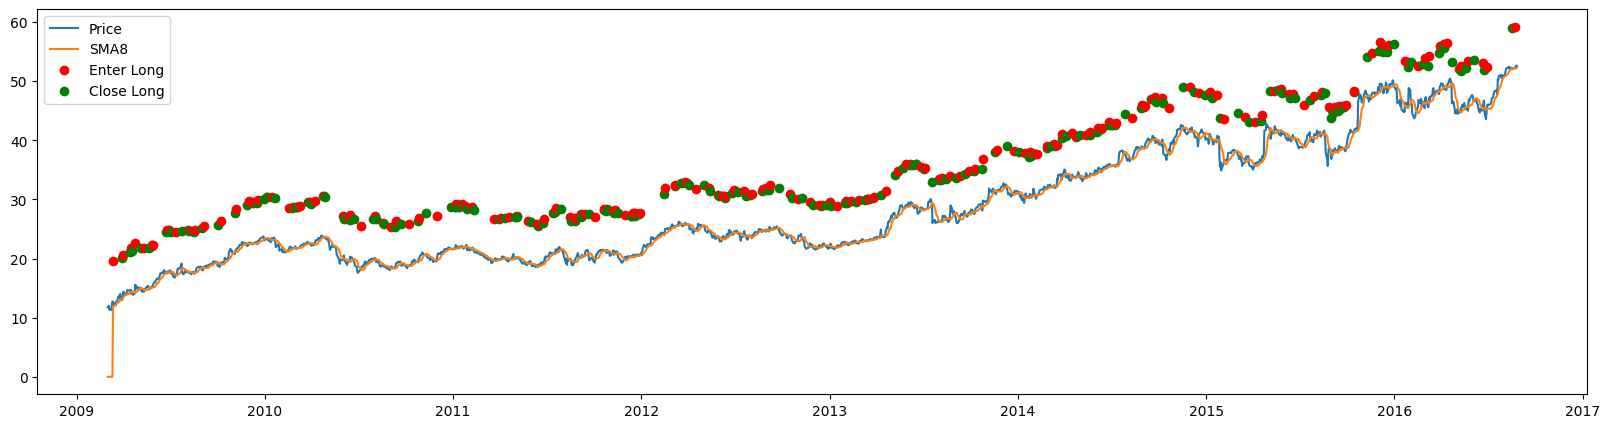

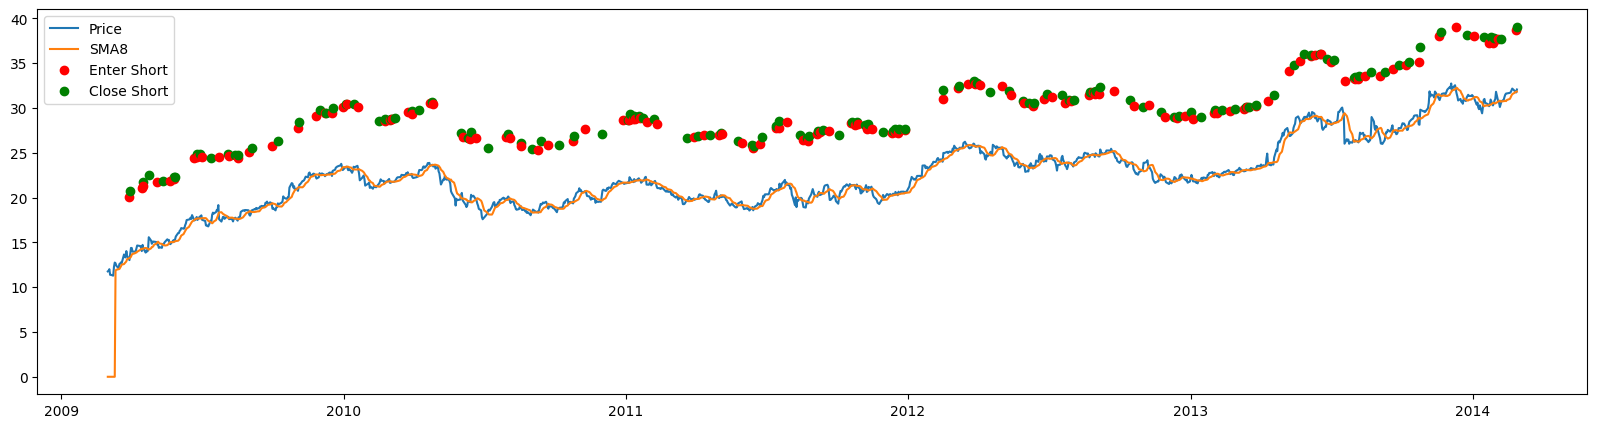

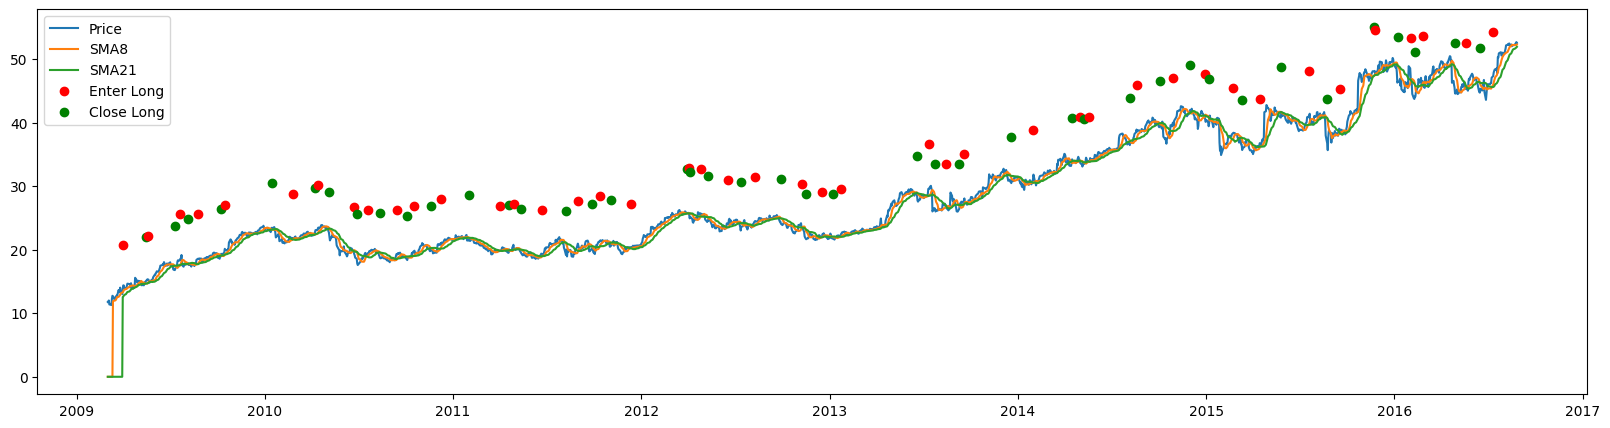

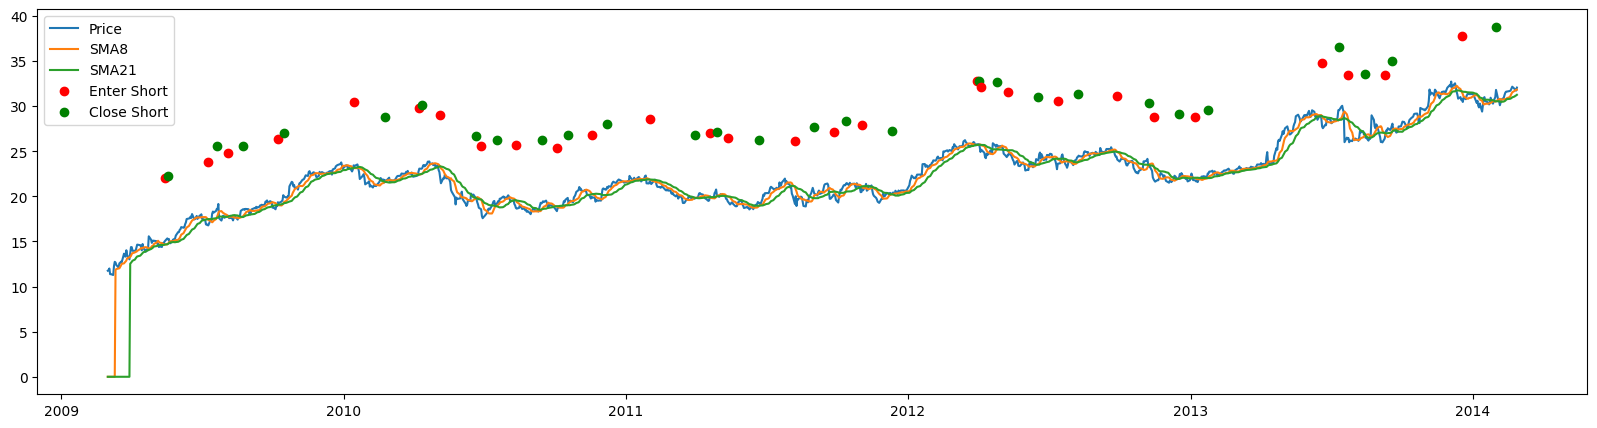

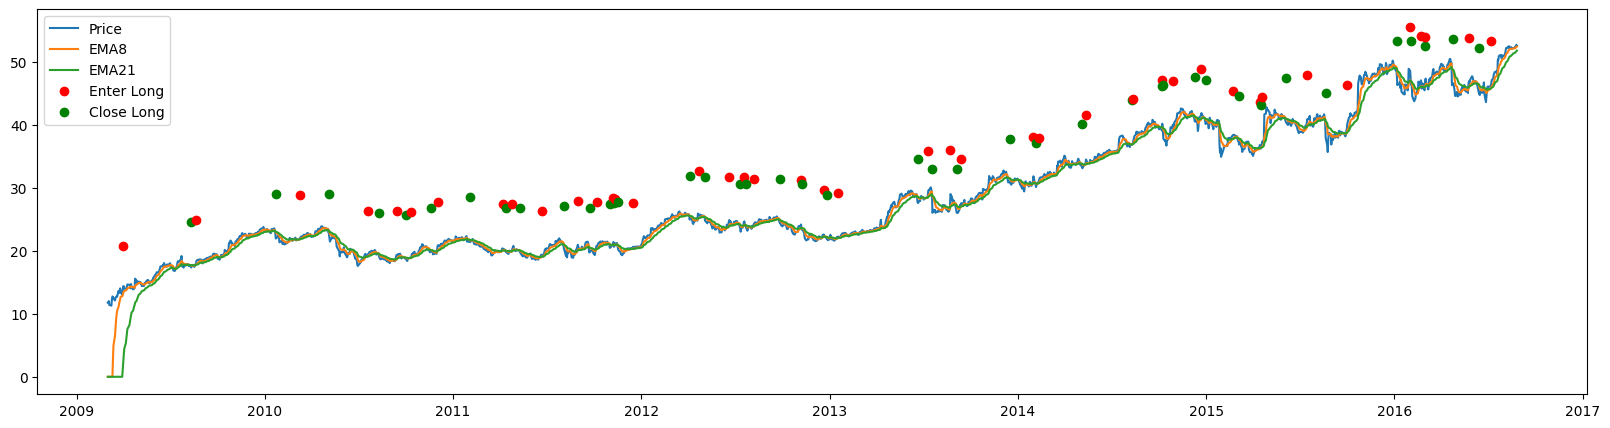

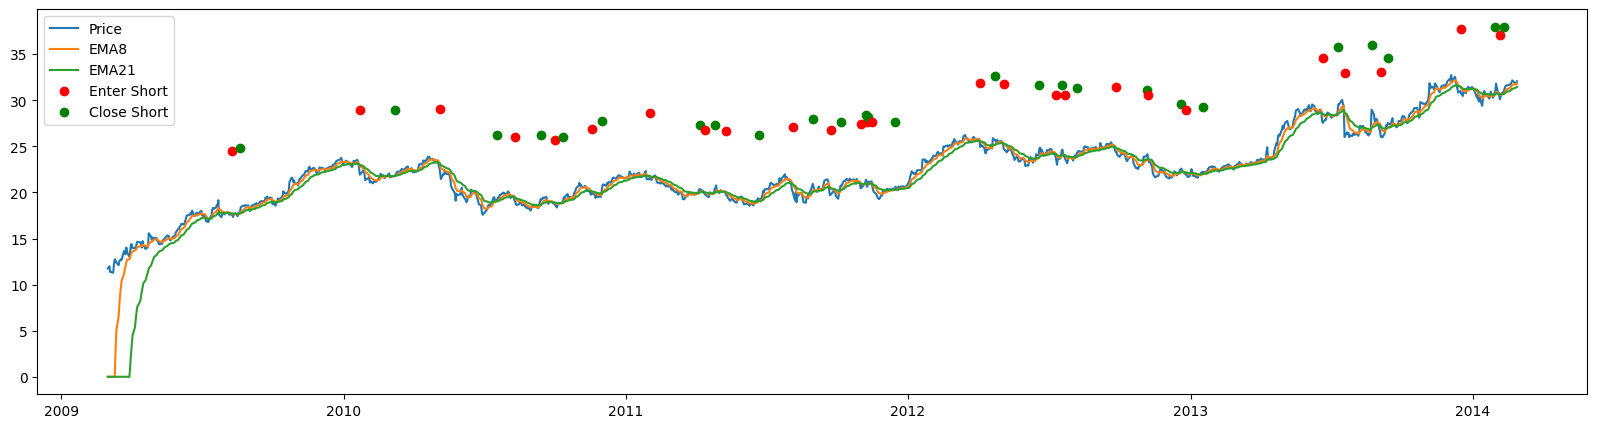

In [57]:
# MSFT Long Strategy1 1/2
plt.figure(figsize=(20,5))

first_half = msft_df.iloc[[i for i in range(len(msft_df)//2)],:]
plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Long1'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+7, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+7, 'ro')

  if row['Long1'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+7, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+7, 'go')
plt.legend()

# MSFT Short Strategy1 1/2
plt.figure(figsize=(20,5))

first_half = msft_df.iloc[[i for i in range(len(msft_df)//3)],:]
plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Short1'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+7, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+7, 'ro')

  if row['Short1'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+7, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+7, 'go')
plt.legend()

# MSFT Long Strategy2 1/2
plt.figure(figsize=(20,5))

first_half = msft_df.iloc[[i for i in range(len(msft_df)//2)],:]
plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['SMA8'], label='SMA8')
plt.plot(first_half.index, first_half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Long2'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+7, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+7, 'ro')

  if row['Long2'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+7, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+7, 'go')
plt.legend()

# MSFT Short Strategy2 1/2
plt.figure(figsize=(20,5))

first_half = msft_df.iloc[[i for i in range(len(msft_df)//3)],:]
plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['SMA8'], label='SMA8')
plt.plot(first_half.index, first_half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Short2'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+7, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+7, 'ro')

  if row['Short2'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+7, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+7, 'go')
plt.legend()

# MSFT Long Strategy3 1/2
plt.figure(figsize=(20,5))

first_half = msft_df.iloc[[i for i in range(len(msft_df)//2)],:]
plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['EMA8'], label='EMA8')
plt.plot(first_half.index, first_half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Long3'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+7, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+7, 'ro')

  if row['Long3'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+7, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+7, 'go')
plt.legend()

# MSFT Short Strategy3 1/2
plt.figure(figsize=(20,5))

first_half = msft_df.iloc[[i for i in range(len(msft_df)//3)],:]
plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['EMA8'], label='EMA8')
plt.plot(first_half.index, first_half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Short3'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+7, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+7, 'ro')

  if row['Short3'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+7, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+7, 'go')
plt.legend()

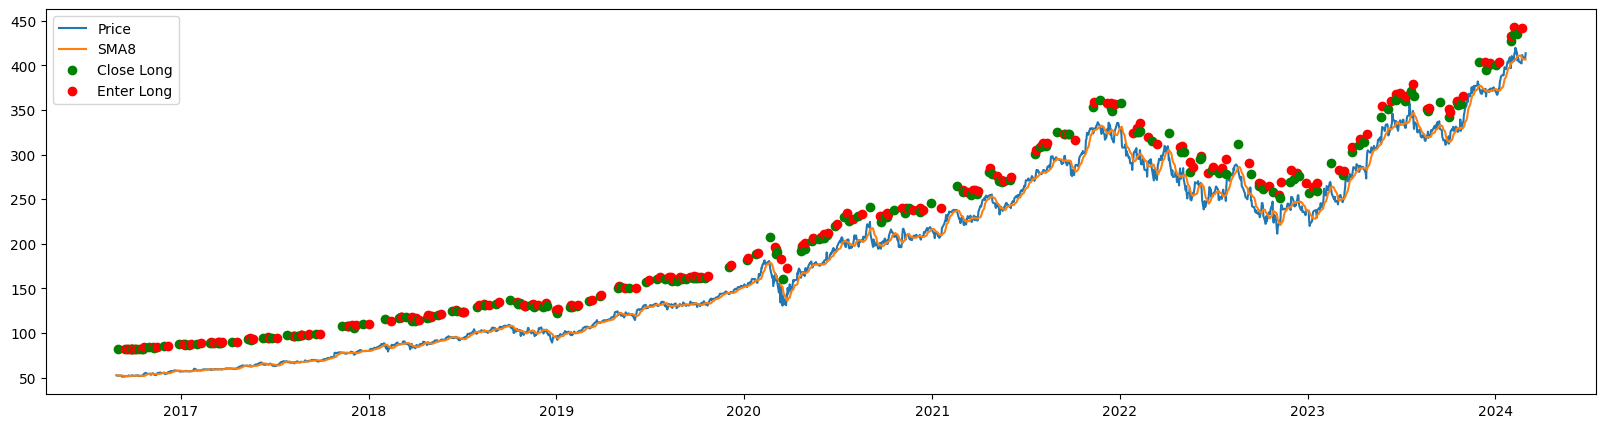

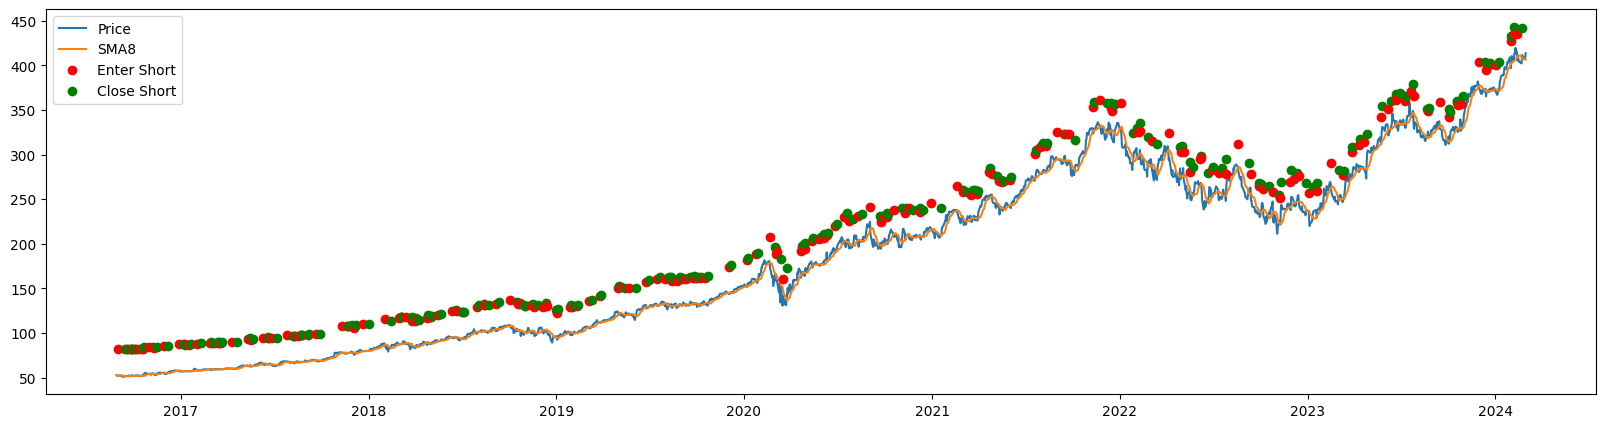

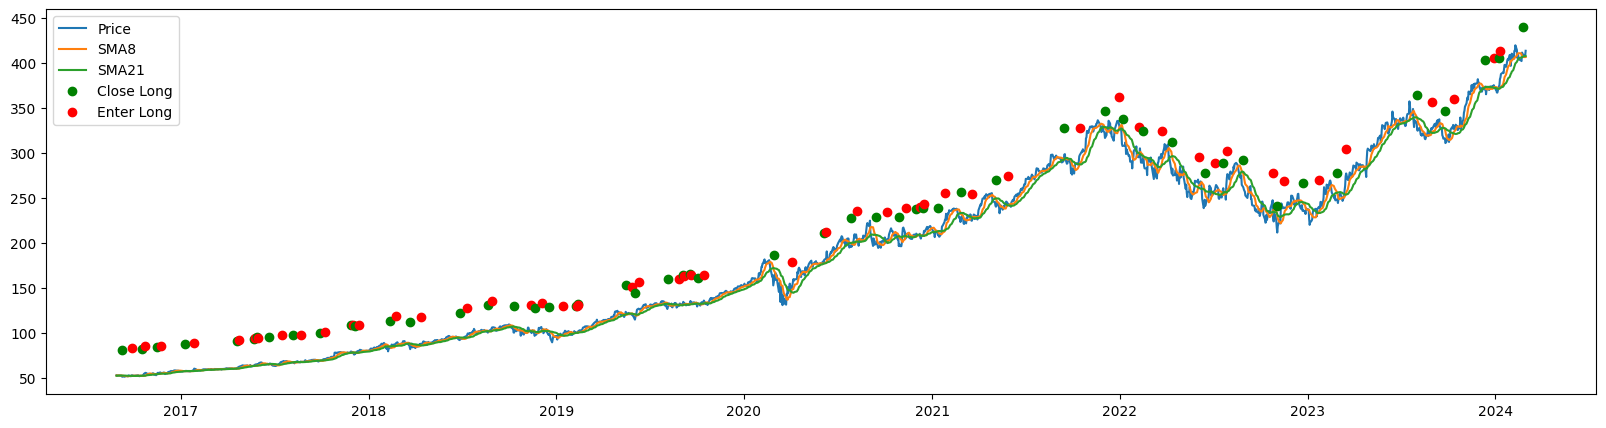

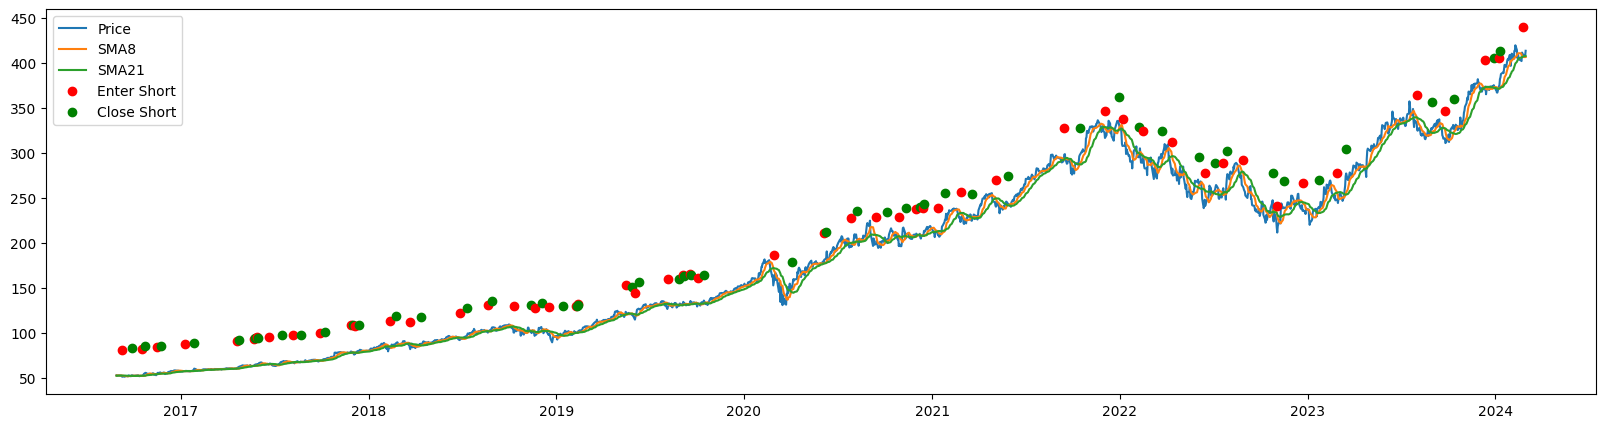

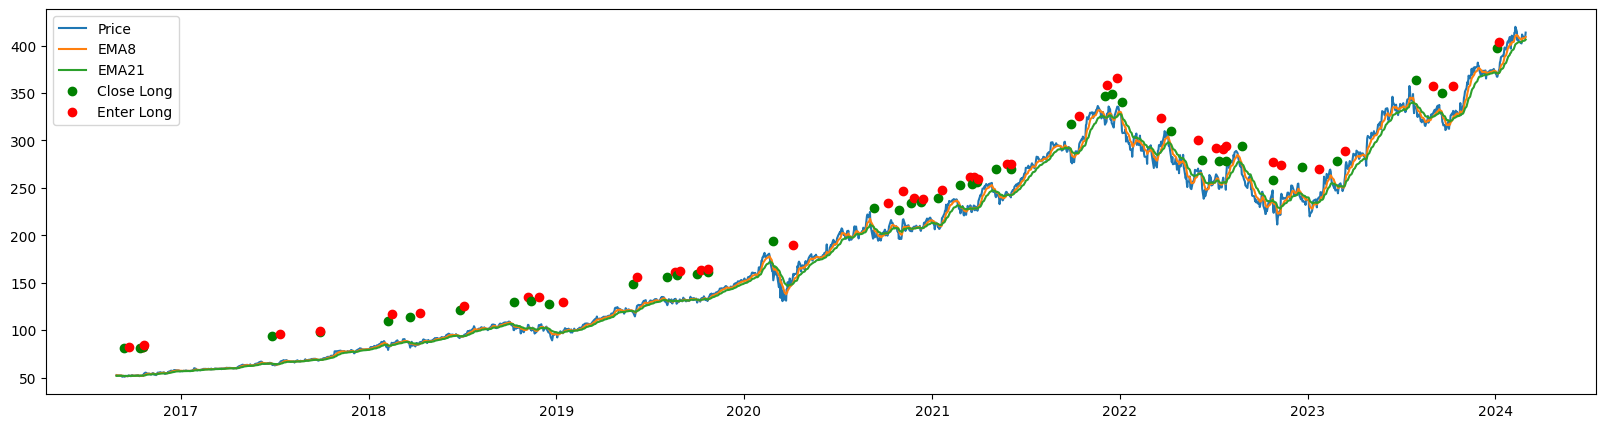

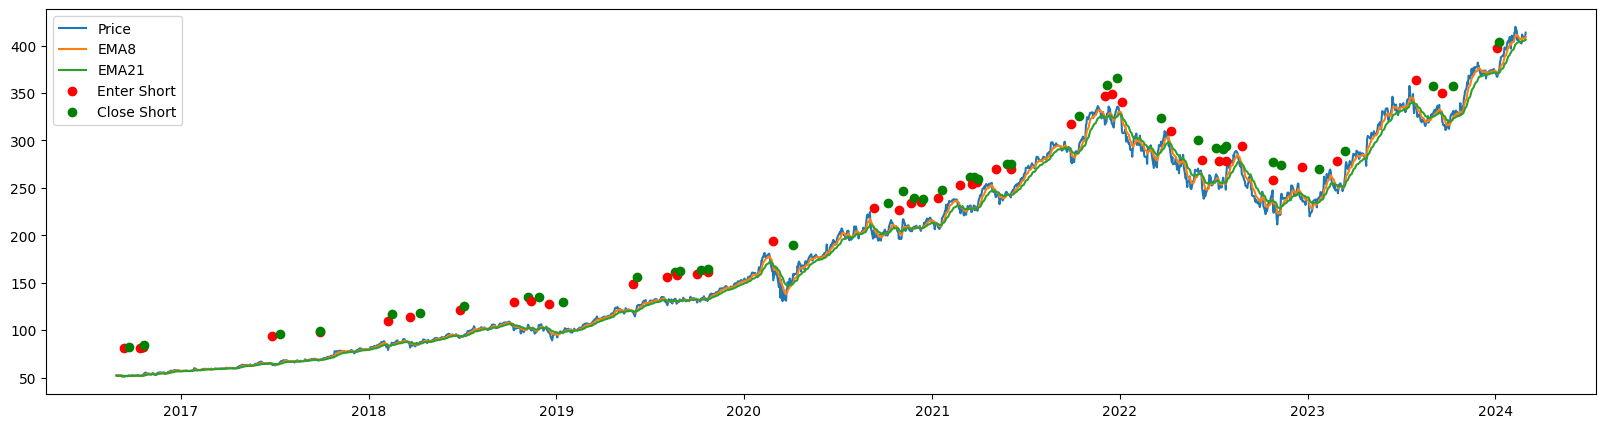

In [58]:
# MSFT Long Strategy1 1/2
plt.figure(figsize=(20,5))

second_half = msft_df.iloc[[i for i in range(len(msft_df)//2, len(msft_df))],:]
plt.plot(second_half.index, second_half['Stock'], label='Price')
plt.plot(second_half.index, second_half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in second_half.iterrows():
  if row['Long1'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+30, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+30, 'ro')

  if row['Long1'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+30, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+30, 'go')
plt.legend()

# MSFT Short Strategy1 1/2
plt.figure(figsize=(20,5))

plt.plot(second_half.index, second_half['Stock'], label='Price')
plt.plot(second_half.index, second_half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in second_half.iterrows():
  if row['Short1'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+30, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+30, 'ro')

  if row['Short1'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+30, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+30, 'go')
plt.legend()

# MSFT Long Strategy2 1/2
plt.figure(figsize=(20,5))

plt.plot(second_half.index, second_half['Stock'], label='Price')
plt.plot(second_half.index, second_half['SMA8'], label='SMA8')
plt.plot(second_half.index, second_half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in second_half.iterrows():
  if row['Long2'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+30, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+30, 'ro')

  if row['Long2'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+30, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+30, 'go')
plt.legend()

# MSFT Short Strategy2 1/2
plt.figure(figsize=(20,5))

plt.plot(second_half.index, second_half['Stock'], label='Price')
plt.plot(second_half.index, second_half['SMA8'], label='SMA8')
plt.plot(second_half.index, second_half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in second_half.iterrows():
  if row['Short2'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+30, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+30, 'ro')

  if row['Short2'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+30, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+30, 'go')
plt.legend()

# MSFT Long Strategy3 1/2
plt.figure(figsize=(20,5))

plt.plot(second_half.index, second_half['Stock'], label='Price')
plt.plot(second_half.index, second_half['EMA8'], label='EMA8')
plt.plot(second_half.index, second_half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in second_half.iterrows():
  if row['Long3'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+30, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+30, 'ro')

  if row['Long3'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+30, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+30, 'go')
plt.legend()

# MSFT Short Strategy3 1/2
plt.figure(figsize=(20,5))

plt.plot(second_half.index, second_half['Stock'], label='Price')
plt.plot(second_half.index, second_half['EMA8'], label='EMA8')
plt.plot(second_half.index, second_half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in second_half.iterrows():
  if row['Short3'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+30, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+30, 'ro')

  if row['Short3'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+30, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+30, 'go')
plt.legend()

# NFLX

In [51]:
nflx = yf.download('NFLX','2009-03-01','2024-03-01')
nflx_price = nflx['Adj Close']
nflx_price

[*********************100%%**********************]  1 of 1 completed


Date
2009-03-02      4.907143
2009-03-03      5.194286
2009-03-04      5.387143
2009-03-05      5.414286
2009-03-06      5.454286
                 ...    
2024-02-23    583.559998
2024-02-26    587.650024
2024-02-27    601.669983
2024-02-28    596.479980
2024-02-29    602.919983
Name: Adj Close, Length: 3776, dtype: float64

In [52]:
nflx_df = strategies(nflx_price)
nflx_df


Strategy #1

Sharpe Ratio:  -0.4094882871029264
Cumulative Return:  12.974717795000009
Buy and Hold Return:  121.86578334033781
Average Win:  0.0808638209896547
Average Loss:  -0.030302819796530992
Max Drawdown:  -0.41945257794378477

Strategy #2

Sharpe Ratio:  -0.14078729772323964
Cumulative Return:  0.717745887325465
Buy and Hold Return:  121.86578334033781
Average Win:  0.1466925421292083
Average Loss:  -0.07705820807497962
Max Drawdown:  -0.9733088337526952

Strategy #3

Sharpe Ratio:  -0.0370982589816504
Cumulative Return:  10.607010441039598
Buy and Hold Return:  121.86578334033781
Average Win:  0.21567661236107336
Average Loss:  -0.0634002535560935
Max Drawdown:  -0.28358648217973975


Stock        SMA8       SMA21        EMA8       EMA21 Long1  \
Date                                                                           
2009-03-02    4.907143    0.000000    0.000000    0.000000    0.000000  None   
2009-03-03    5.194286    0.000000    0.000000    0.000000    0.000000  None   
2009-03-04    5.387143    0.000000    0.000000    0.000000    0.000000  None   
2009-03-05    5.414286    0.000000    0.000000    0.000000    0.000000  None   
2009-03-06    5.454286    0.000000    0.000000    0.000000    0.000000  None   
...                ...         ...         ...         ...         ...   ...   
2024-02-23  583.559998  575.757500  567.397141  578.084006  561.560659  None   
2024-02-26  587.650024  578.971252  569.239522  580.209788  563.932420  None   
2024-02-27  601.669983  583.112503  570.460952  584.978720  567.363107  None   
2024-02-28  596.479980  585.904999  571.949047  587.534556  570.010096  None   
2024-02-29  602.919983  586.282494  572.934285  590.953539  573.001904  None   

           Short1 Long2 Short2 Long3 Short3  
Date                                         
2009-03-02   None  None   None  None   None  
2009-03-03   None  None   None  None   None  
2009-03-04   None  None   None  None   None  
2009-03-05   None  None   None  None   None  
2009-03-06   None  None   None  None   None  
...           ...   ...    ...   ...    ...  
2024-02-23   None  None   None  None   None  
2024-02-26   None  None   None  None   None  
2024-02-27   None  None   None  None   None  
2024-02-28   None  None   None  None   None  
2024-02-29   None  None   None  None   None  

[3776 rows x 11 columns]

# NFLX Graphs

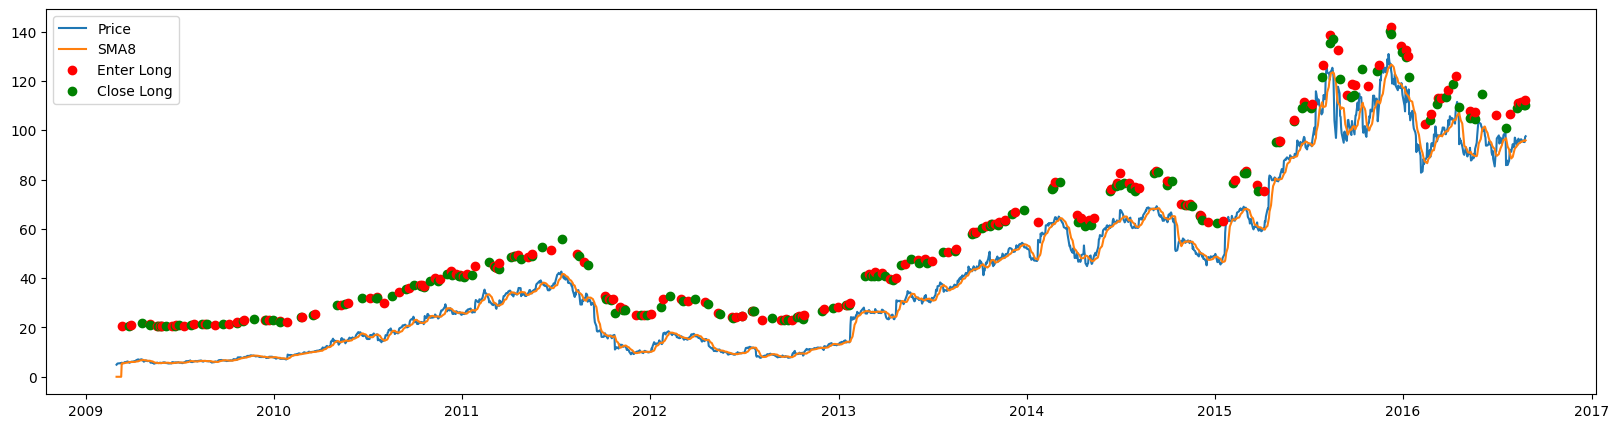

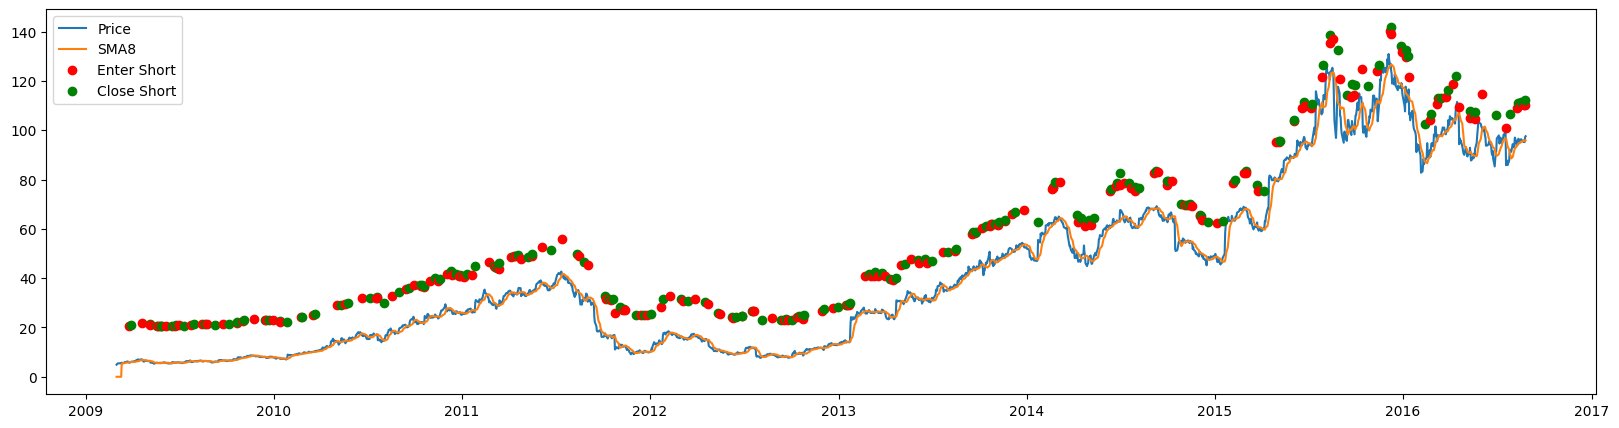

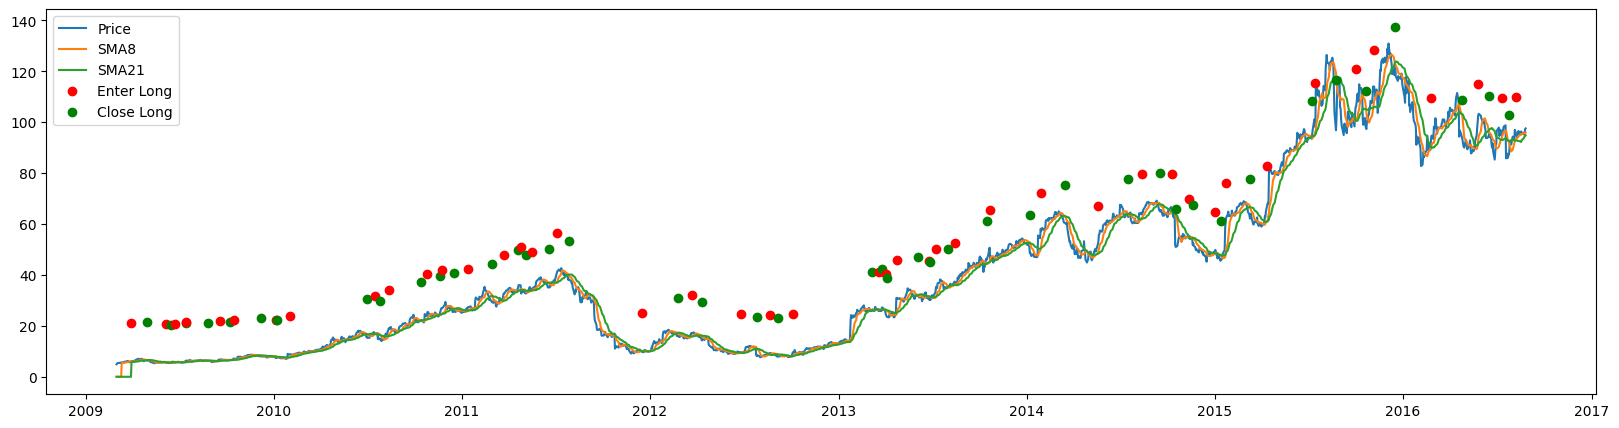

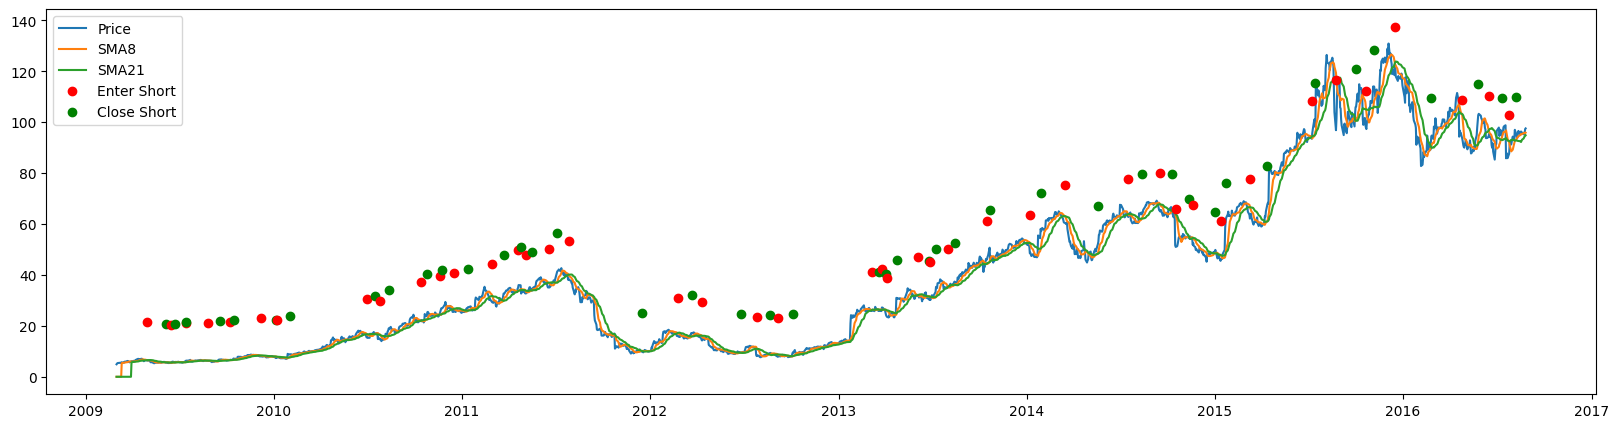

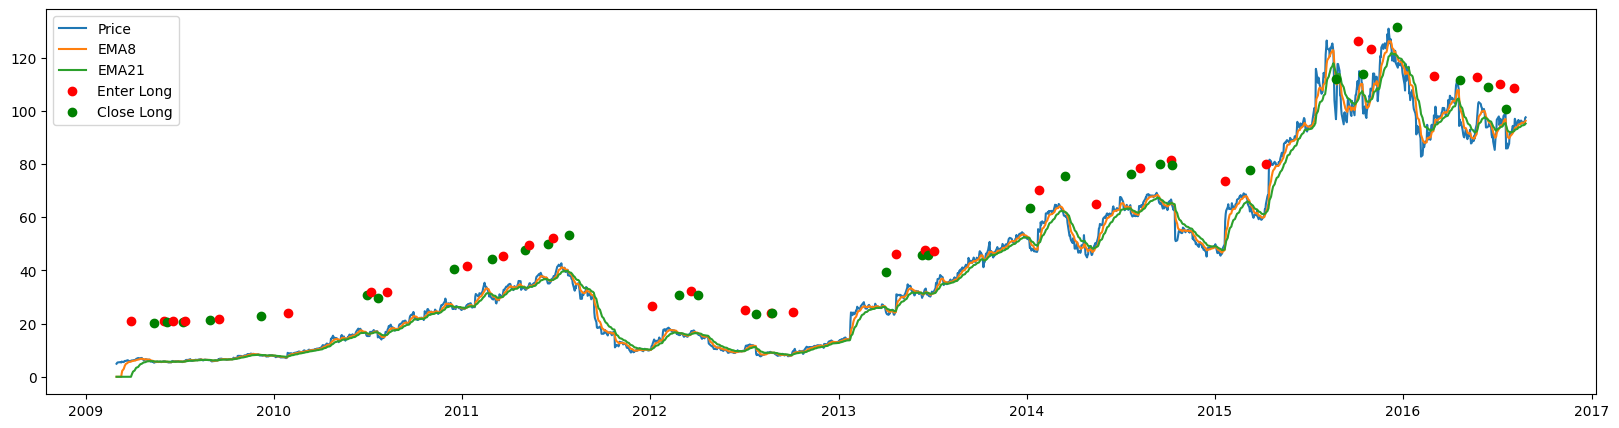

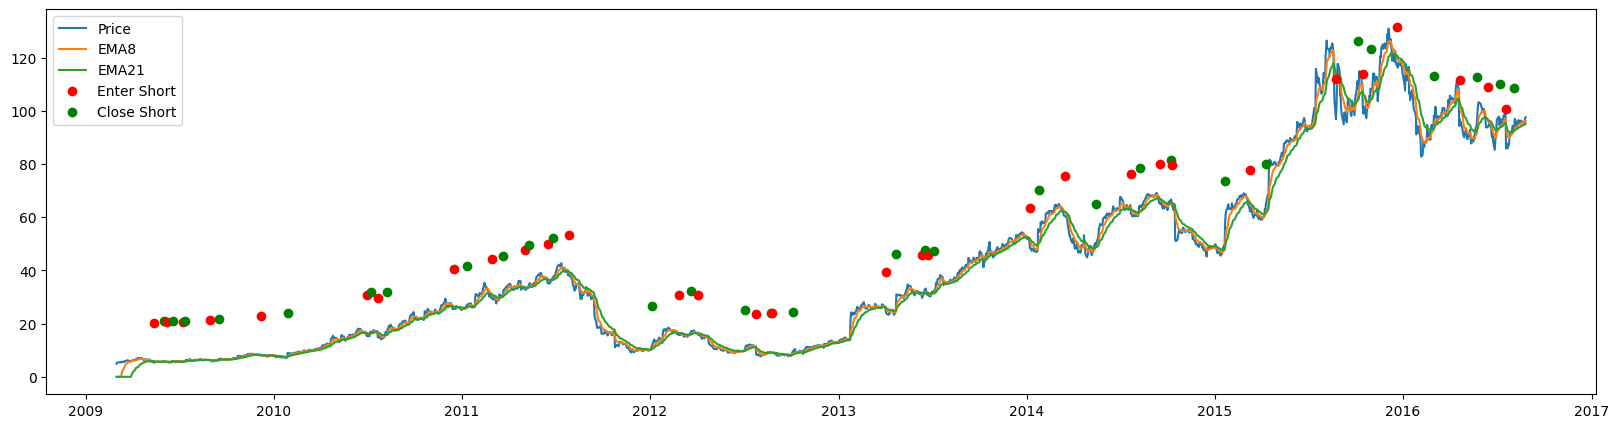

In [62]:
first_half = nflx_df.iloc[[i for i in range(len(nflx_df)//2)],:]
height = 15

# Long Strategy1 1/2
plt.figure(figsize=(20,5))

plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Long1'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long1'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy1 1/2
plt.figure(figsize=(20,5))

plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Short1'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short1'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy2 1/2
plt.figure(figsize=(20,5))

plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['SMA8'], label='SMA8')
plt.plot(first_half.index, first_half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Long2'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long2'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy2 1/2
plt.figure(figsize=(20,5))

plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['SMA8'], label='SMA8')
plt.plot(first_half.index, first_half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Short2'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short2'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy3 1/2
plt.figure(figsize=(20,5))

plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['EMA8'], label='EMA8')
plt.plot(first_half.index, first_half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Long3'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long3'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy3 1/2
plt.figure(figsize=(20,5))

plt.plot(first_half.index, first_half['Stock'], label='Price')
plt.plot(first_half.index, first_half['EMA8'], label='EMA8')
plt.plot(first_half.index, first_half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in first_half.iterrows():
  if row['Short3'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short3'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

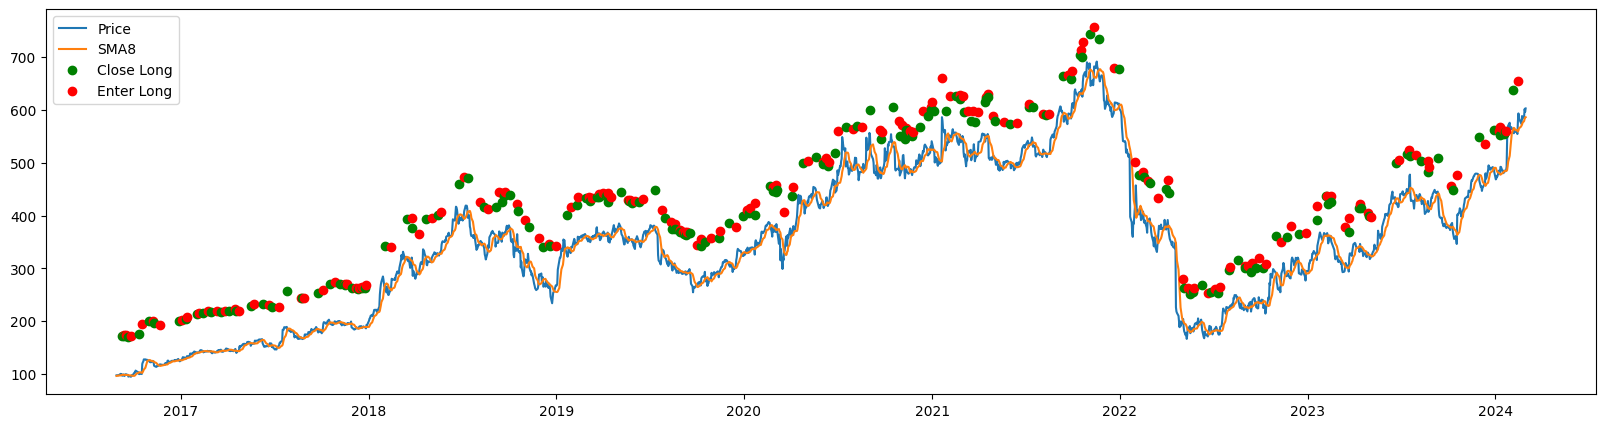

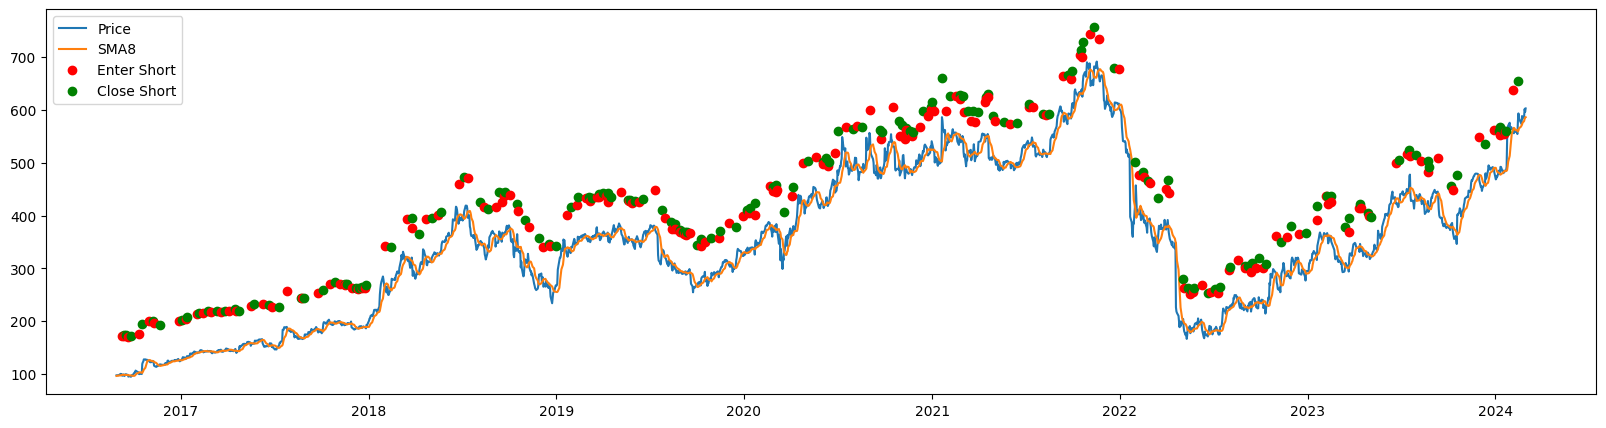

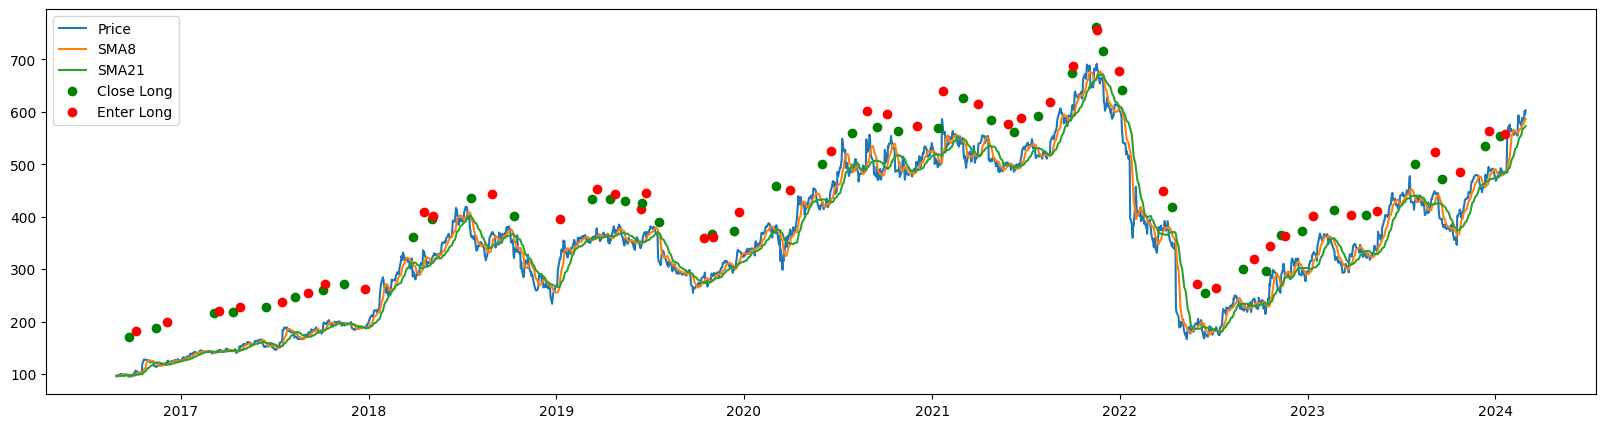

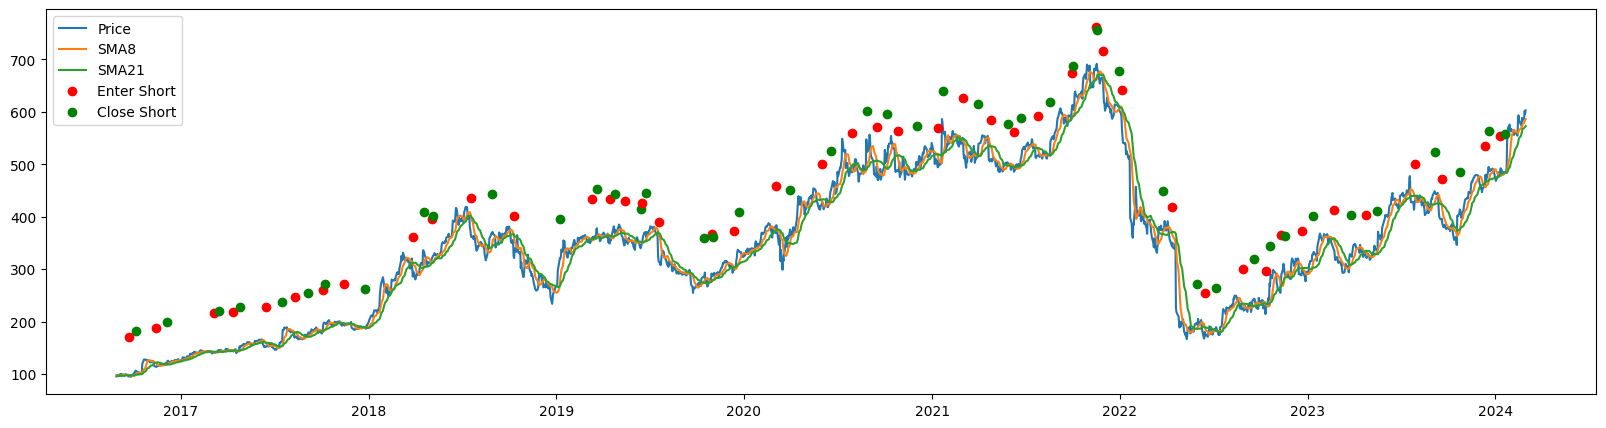

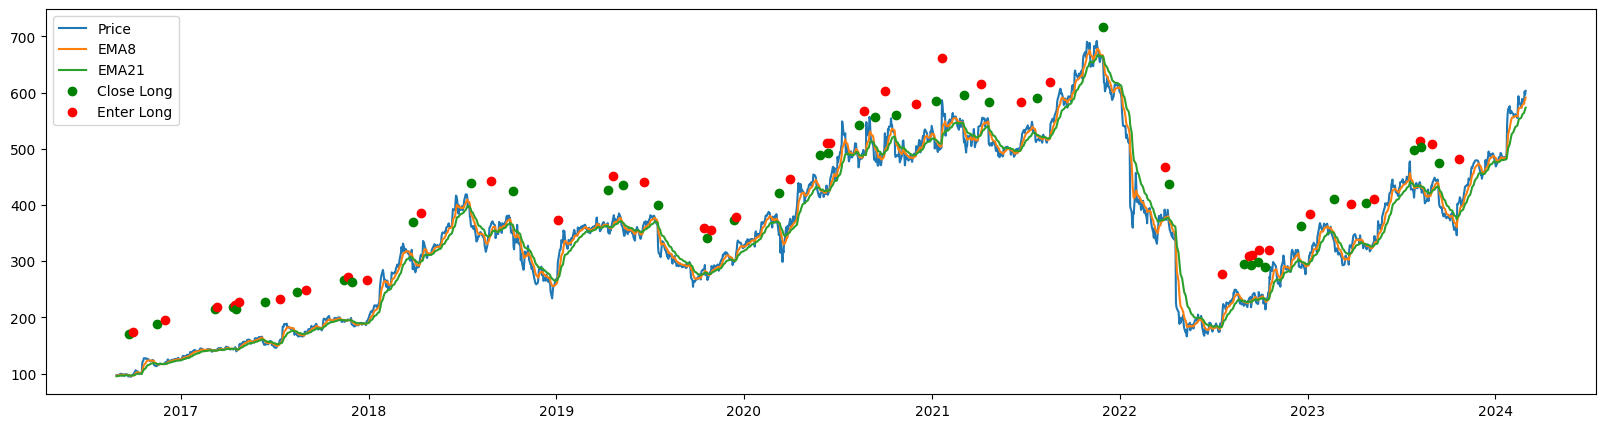

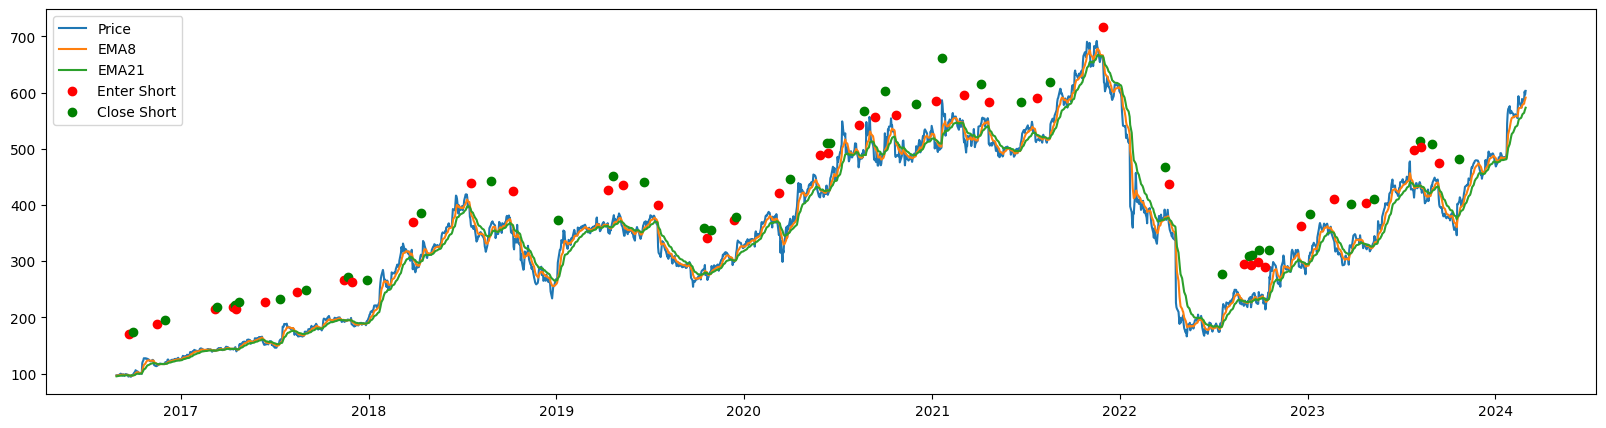

In [65]:
half = nflx_df.iloc[[i for i in range(len(nflx_df)//2, len(nflx_df))],:]
height = 75

# Long Strategy1 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long1'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long1'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy1 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short1'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short1'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy2 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long2'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long2'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy2 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short2'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short2'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy3 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long3'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long3'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy3 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short3'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short3'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# NVDA

In [66]:
nvda = yf.download('NVDA','2009-03-01','2024-03-01')
nvda_price = nvda['Adj Close']
nvda_price

[*********************100%%**********************]  1 of 1 completed


Date
2009-03-02      1.738287
2009-03-03      1.807085
2009-03-04      1.940094
2009-03-05      1.894229
2009-03-06      1.924041
                 ...    
2024-02-23    788.132996
2024-02-26    790.882874
2024-02-27    786.973083
2024-02-28    776.593567
2024-02-29    791.082886
Name: Adj Close, Length: 3776, dtype: float64

In [67]:
nvda_df = strategies(nvda_price)
nvda_df


Strategy #1

Sharpe Ratio:  -0.49102007245061424
Cumulative Return:  3.4238184677888976
Buy and Hold Return:  454.09328189756405
Average Win:  0.07259688867853763
Average Loss:  -0.02915895402478728
Max Drawdown:  -0.9529540705887105

Strategy #2

Sharpe Ratio:  -0.1617852720545111
Cumulative Return:  3.198811179798411
Buy and Hold Return:  454.09328189756405
Average Win:  0.13269252796430345
Average Loss:  -0.060560326815094295
Max Drawdown:  -0.9509573129524701

Strategy #3

Sharpe Ratio:  -0.06688061086790427
Cumulative Return:  3.122697469188617
Buy and Hold Return:  454.09328189756405
Average Win:  0.25172634173684605
Average Loss:  -0.05663612457474072
Max Drawdown:  -0.9248557358702786


Stock        SMA8       SMA21        EMA8       EMA21 Long1  \
Date                                                                           
2009-03-02    1.738287    0.000000    0.000000    0.000000    0.000000  None   
2009-03-03    1.807085    0.000000    0.000000    0.000000    0.000000  None   
2009-03-04    1.940094    0.000000    0.000000    0.000000    0.000000  None   
2009-03-05    1.894229    0.000000    0.000000    0.000000    0.000000  None   
2009-03-06    1.924041    0.000000    0.000000    0.000000    0.000000  None   
...                ...         ...         ...         ...         ...   ...   
2024-02-23  788.132996  723.727303  680.158572  735.500995  689.945426  None   
2024-02-26  790.882874  731.938164  688.470087  747.808079  699.121557  None   
2024-02-27  786.973083  740.642746  696.791126  756.511414  707.108060  None   
2024-02-28  776.593567  746.643715  705.205017  760.974114  713.424924  None   
2024-02-29  791.082886  752.899666  712.441819  767.664952  720.484739  None   

           Short1 Long2 Short2 Long3 Short3  
Date                                         
2009-03-02   None  None   None  None   None  
2009-03-03   None  None   None  None   None  
2009-03-04   None  None   None  None   None  
2009-03-05   None  None   None  None   None  
2009-03-06   None  None   None  None   None  
...           ...   ...    ...   ...    ...  
2024-02-23   None  None   None  None   None  
2024-02-26   None  None   None  None   None  
2024-02-27   None  None   None  None   None  
2024-02-28   None  None   None  None   None  
2024-02-29   None  None   None  None   None  

[3776 rows x 11 columns]

# NVDA Graphs

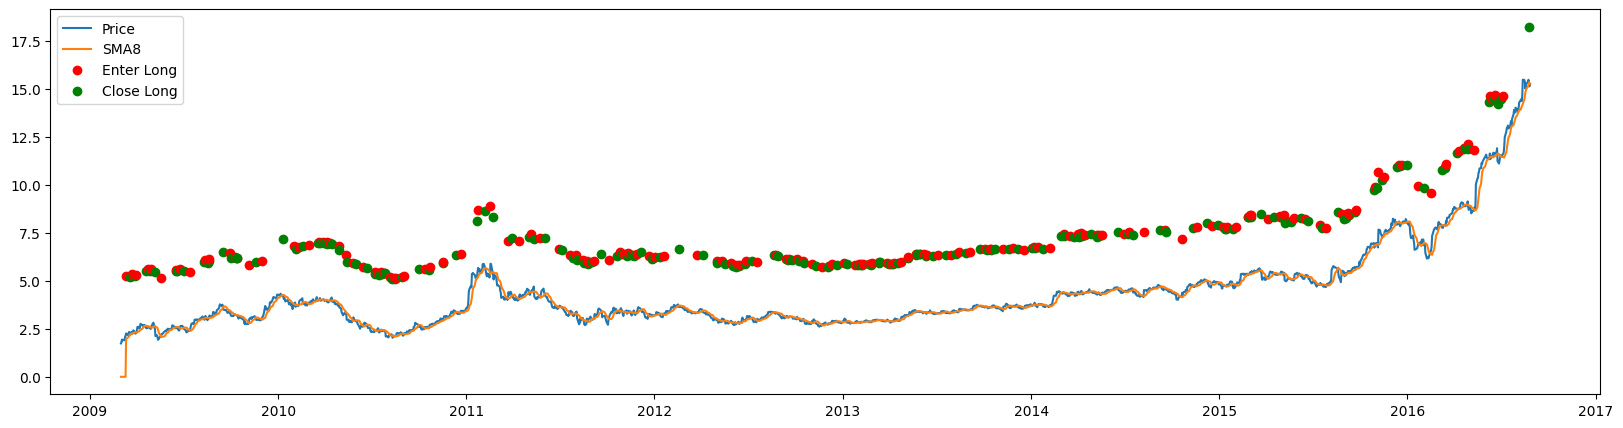

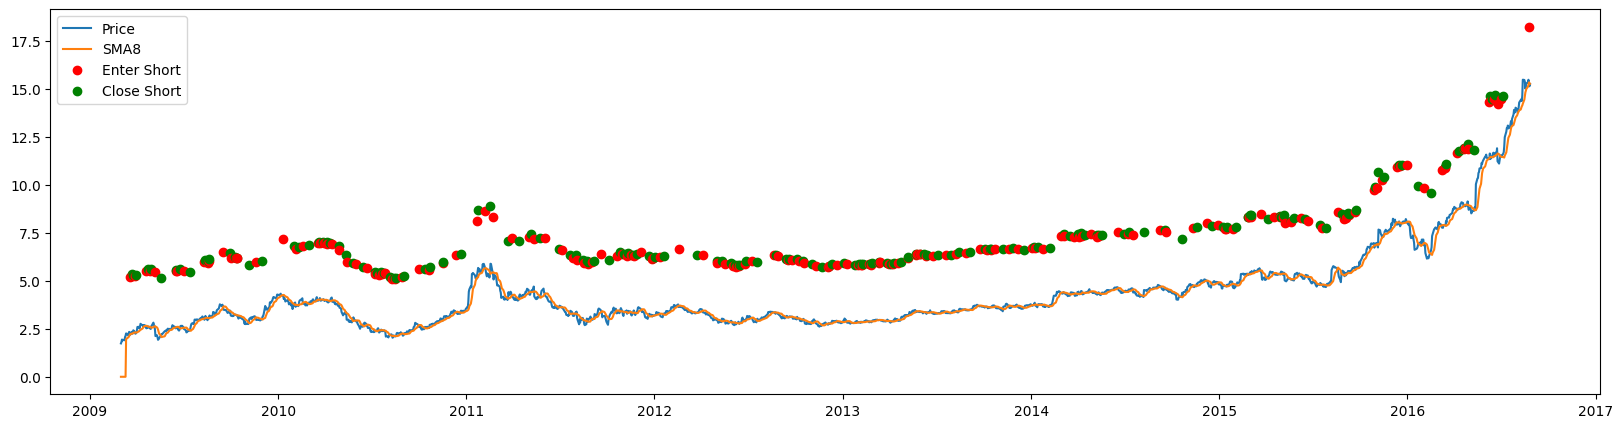

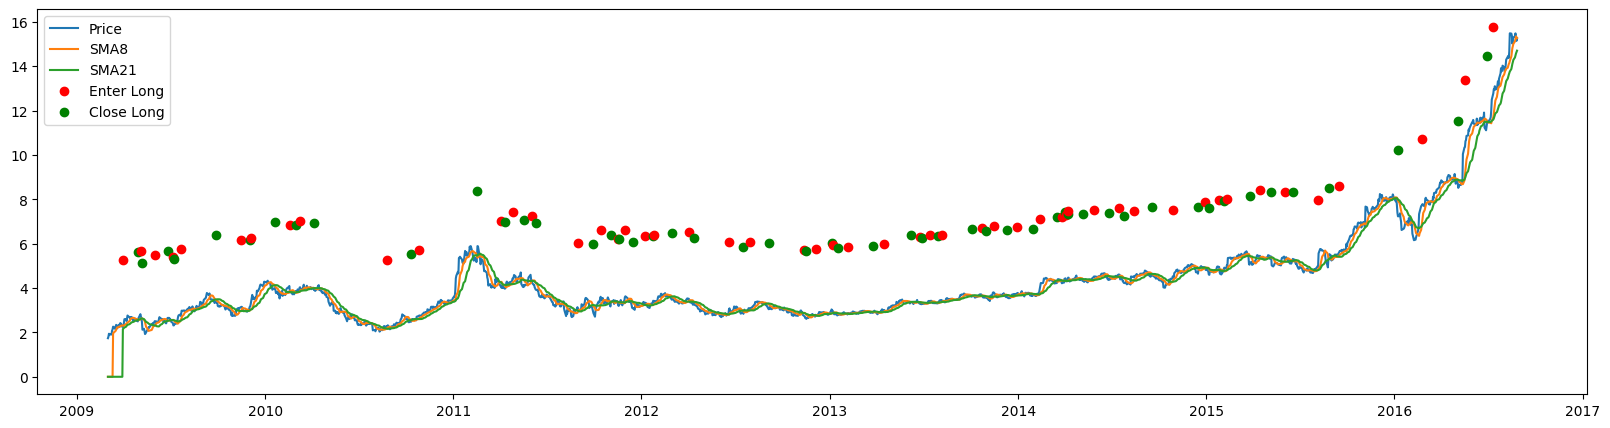

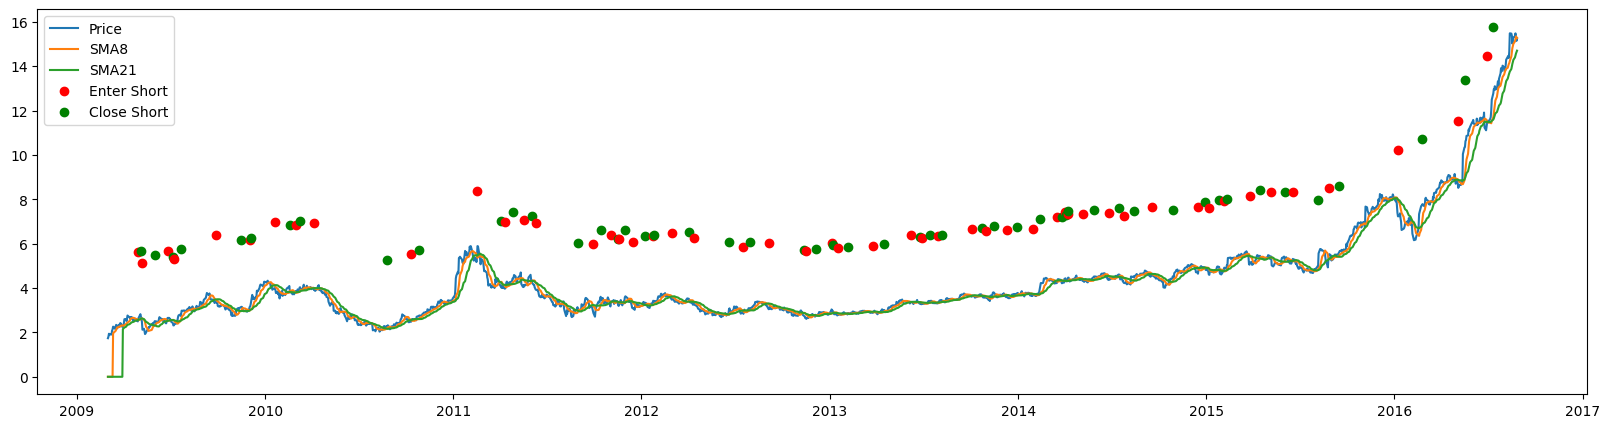

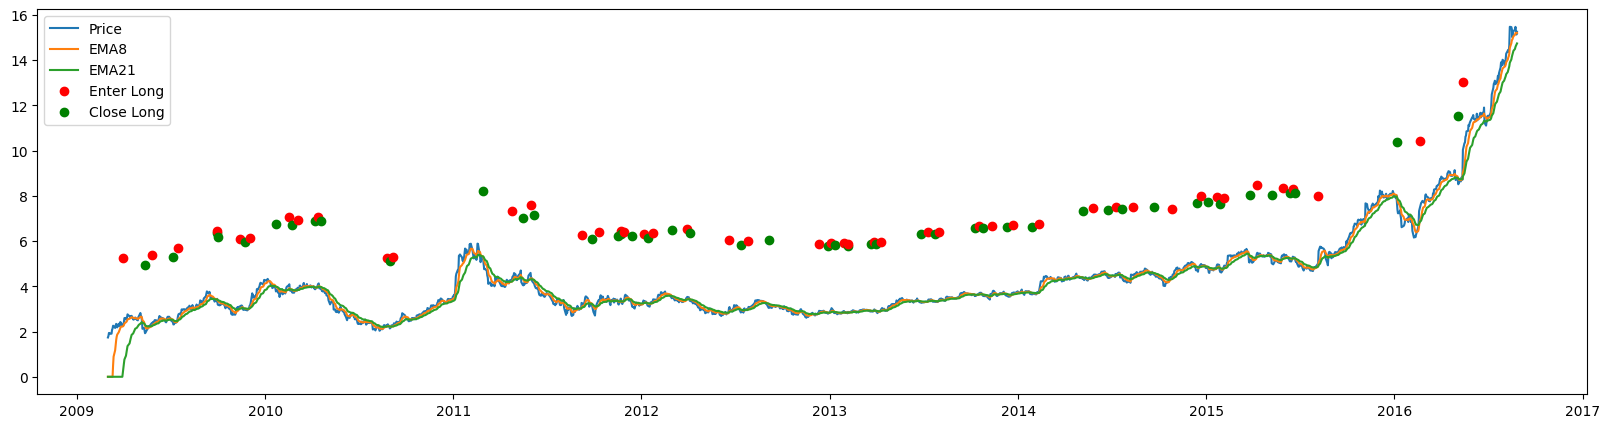

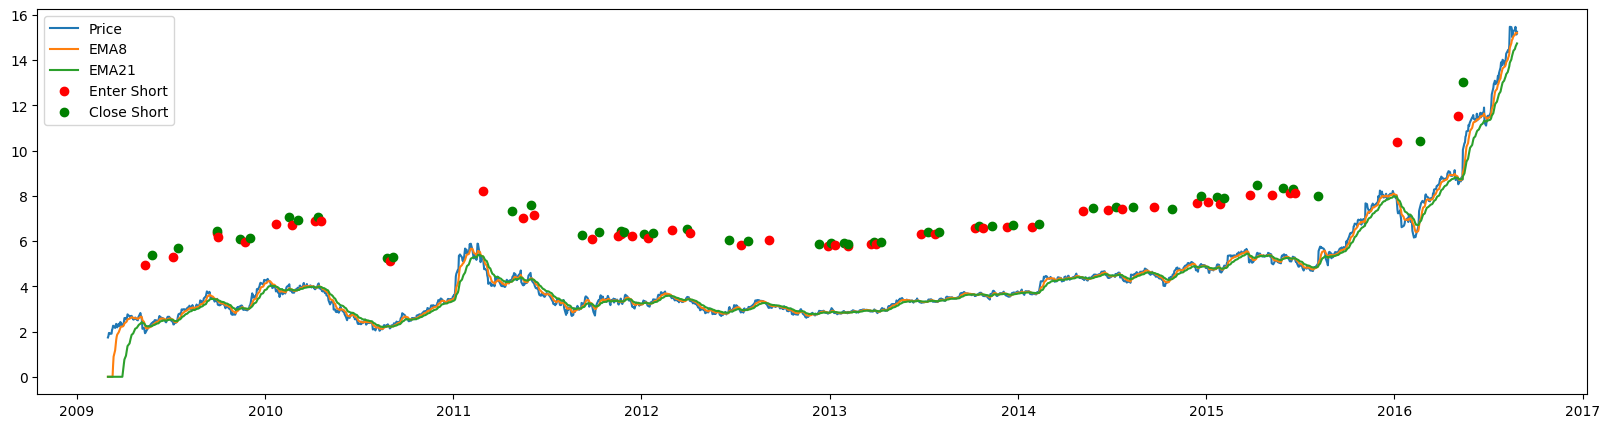

In [72]:
half = nvda_df.iloc[[i for i in range(len(nvda_df)//2)],:]
height = 3

# Long Strategy1 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long1'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long1'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy1 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short1'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short1'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy2 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long2'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long2'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy2 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short2'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short2'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy3 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long3'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long3'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy3 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short3'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short3'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

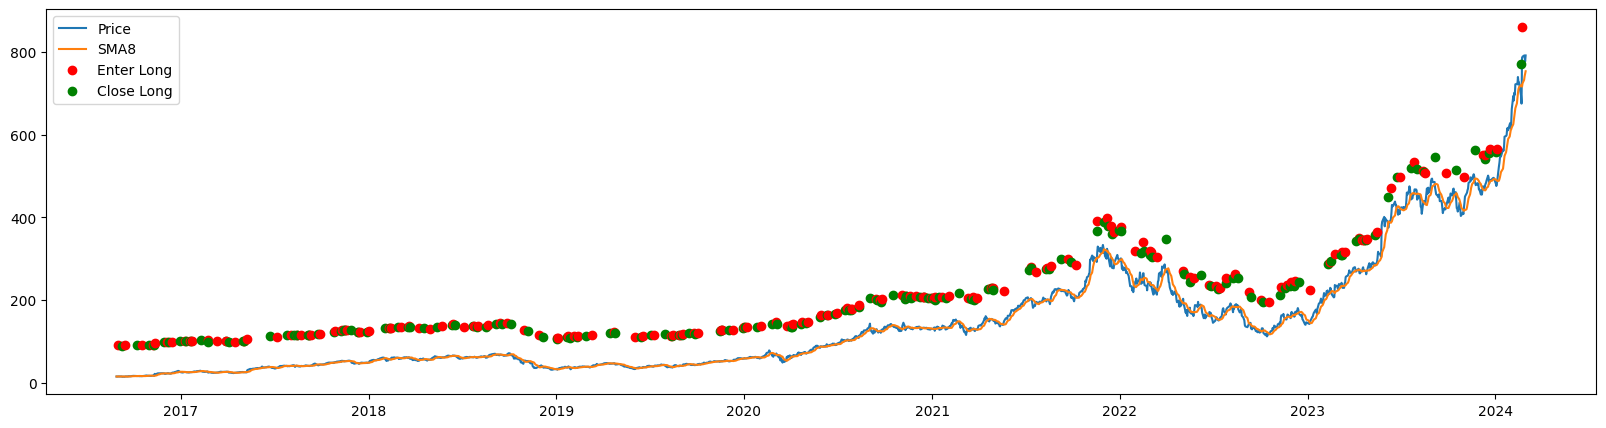

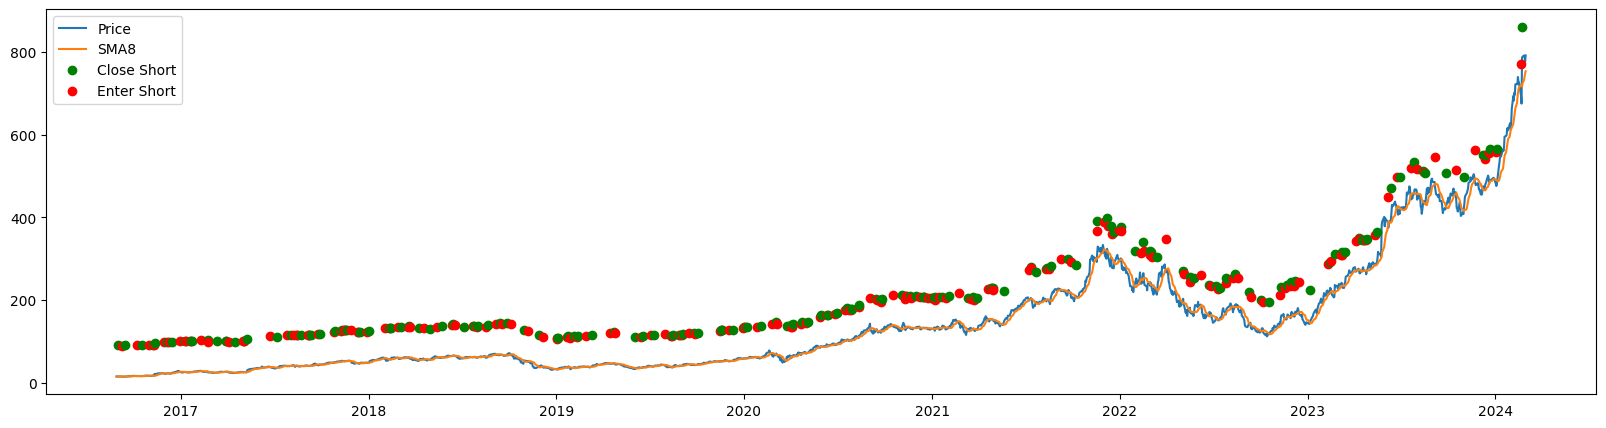

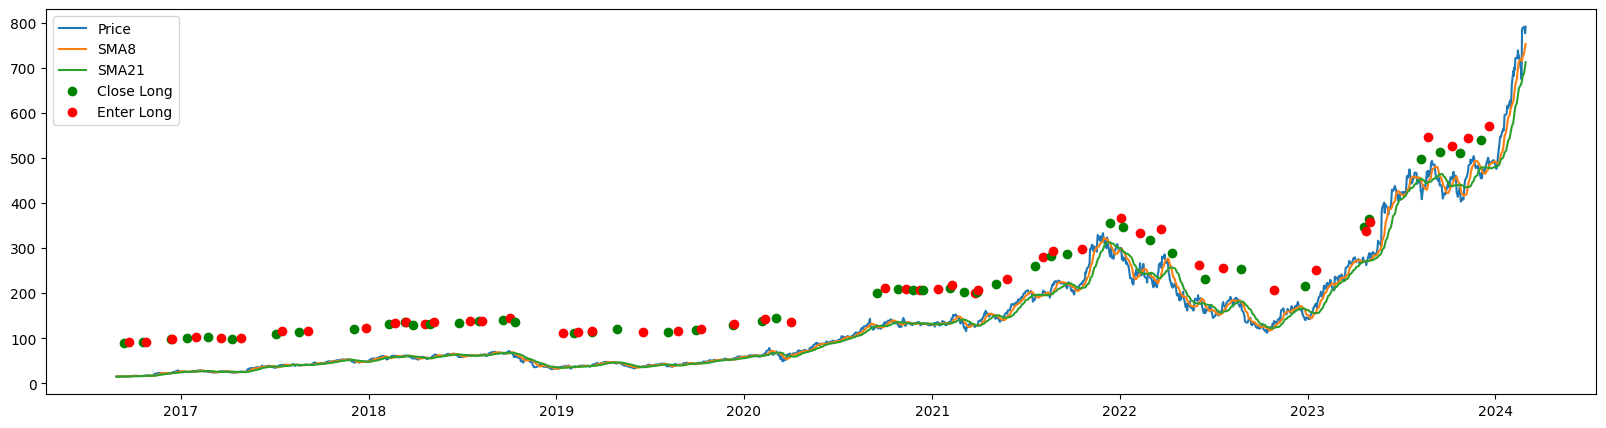

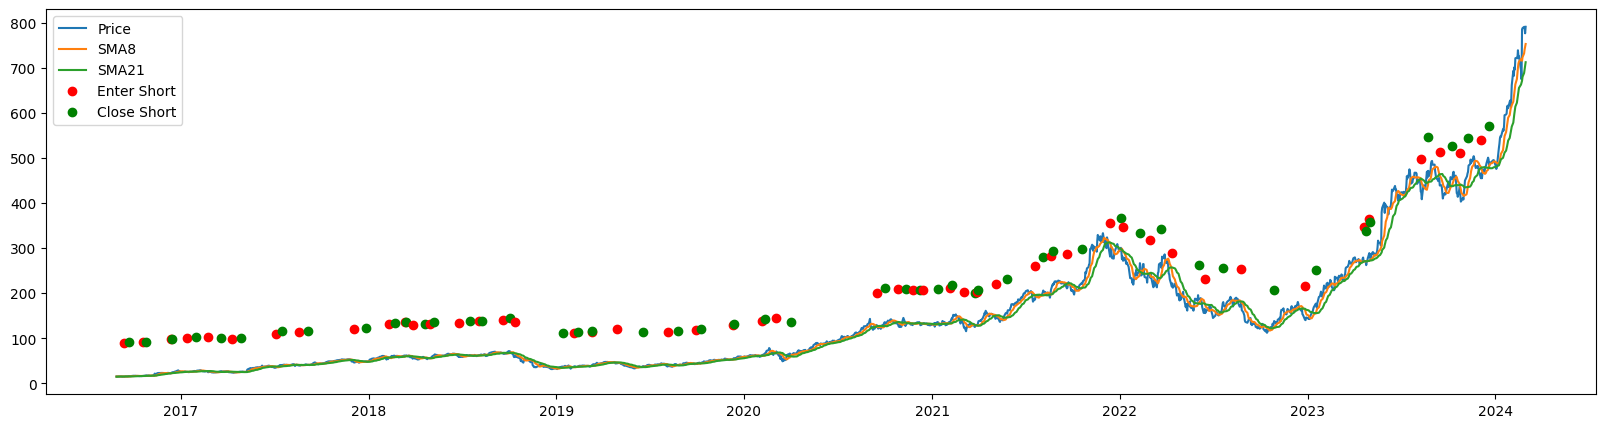

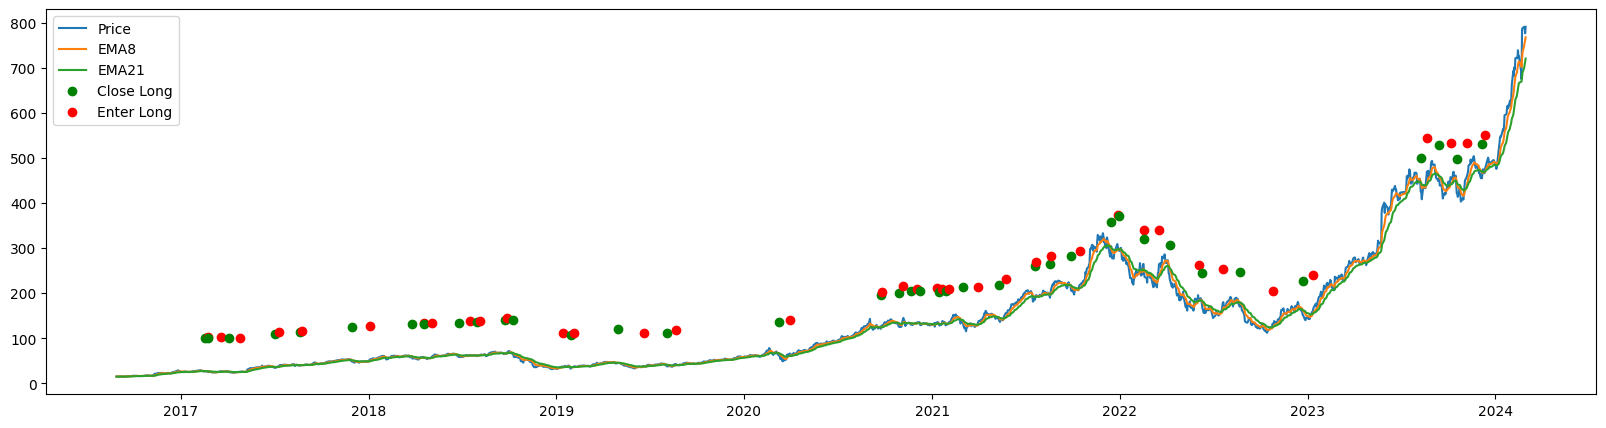

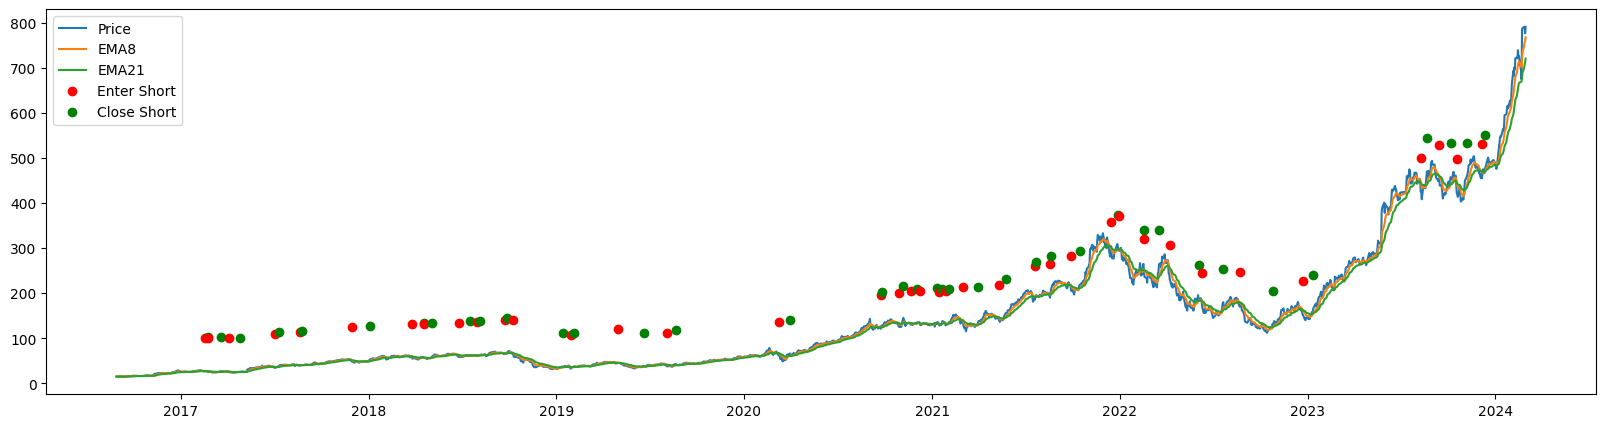

In [68]:
half = nvda_df.iloc[[i for i in range(len(nvda_df)//2, len(nvda_df))],:]
height = 75

# Long Strategy1 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long1'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long1'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy1 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short1'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short1'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy2 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long2'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long2'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy2 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short2'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short2'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy3 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long3'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long3'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy3 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short3'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short3'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# AAPL

In [73]:
aapl = yf.download('AAPL','2009-03-01','2024-03-01')
aapl_price = aapl['Adj Close']
aapl_price

[*********************100%%**********************]  1 of 1 completed


Date
2009-03-02      2.658926
2009-03-03      2.671928
2009-03-04      2.756588
2009-03-05      2.686138
2009-03-06      2.579105
                 ...    
2024-02-23    182.520004
2024-02-26    181.160004
2024-02-27    182.630005
2024-02-28    181.419998
2024-02-29    180.750000
Name: Adj Close, Length: 3776, dtype: float64

In [74]:
aapl_df = strategies(aapl_price)
aapl_df


Strategy #1

Sharpe Ratio:  -0.863801120485117
Cumulative Return:  2.9006191773847614
Buy and Hold Return:  66.9785623580904
Average Win:  0.04557629366125204
Average Loss:  -0.019104773980695874
Max Drawdown:  -0.8291860602232322

Strategy #2

Sharpe Ratio:  -0.28343062158694127
Cumulative Return:  3.2676584558431636
Buy and Hold Return:  66.9785623580904
Average Win:  0.08898356954726631
Average Loss:  -0.0447419745590982
Max Drawdown:  -0.7906906841059825

Strategy #3

Sharpe Ratio:  -0.20729585888898455
Cumulative Return:  4.254237021480462
Buy and Hold Return:  66.9785623580904
Average Win:  0.13367747697975765
Average Loss:  -0.03650085049598425
Max Drawdown:  -0.17744692474294743


Stock        SMA8       SMA21        EMA8       EMA21 Long1  \
Date                                                                           
2009-03-02    2.658926    0.000000    0.000000    0.000000    0.000000  None   
2009-03-03    2.671928    0.000000    0.000000    0.000000    0.000000  None   
2009-03-04    2.756588    0.000000    0.000000    0.000000    0.000000  None   
2009-03-05    2.686138    0.000000    0.000000    0.000000    0.000000  None   
2009-03-06    2.579105    0.000000    0.000000    0.000000    0.000000  None   
...                ...         ...         ...         ...         ...   ...   
2024-02-23  182.520004  183.844997  187.113985  183.709946  185.674272  None   
2024-02-26  181.160004  183.266249  186.555312  183.143292  185.263884  None   
2024-02-27  182.630005  182.781250  185.947572  183.029228  185.024440  None   
2024-02-28  181.419998  182.591251  185.493059  182.671622  184.696764  None   
2024-02-29  180.750000  182.286251  185.013742  182.244595  184.337967  None   

           Short1 Long2 Short2 Long3 Short3  
Date                                         
2009-03-02   None  None   None  None   None  
2009-03-03   None  None   None  None   None  
2009-03-04   None  None   None  None   None  
2009-03-05   None  None   None  None   None  
2009-03-06   None  None   None  None   None  
...           ...   ...    ...   ...    ...  
2024-02-23   None  None   None  None   None  
2024-02-26   None  None   None  None   None  
2024-02-27   None  None   None  None   None  
2024-02-28   None  None   None  None   None  
2024-02-29   None  None   None  None   None  

[3776 rows x 11 columns]

# AAPL Graphs

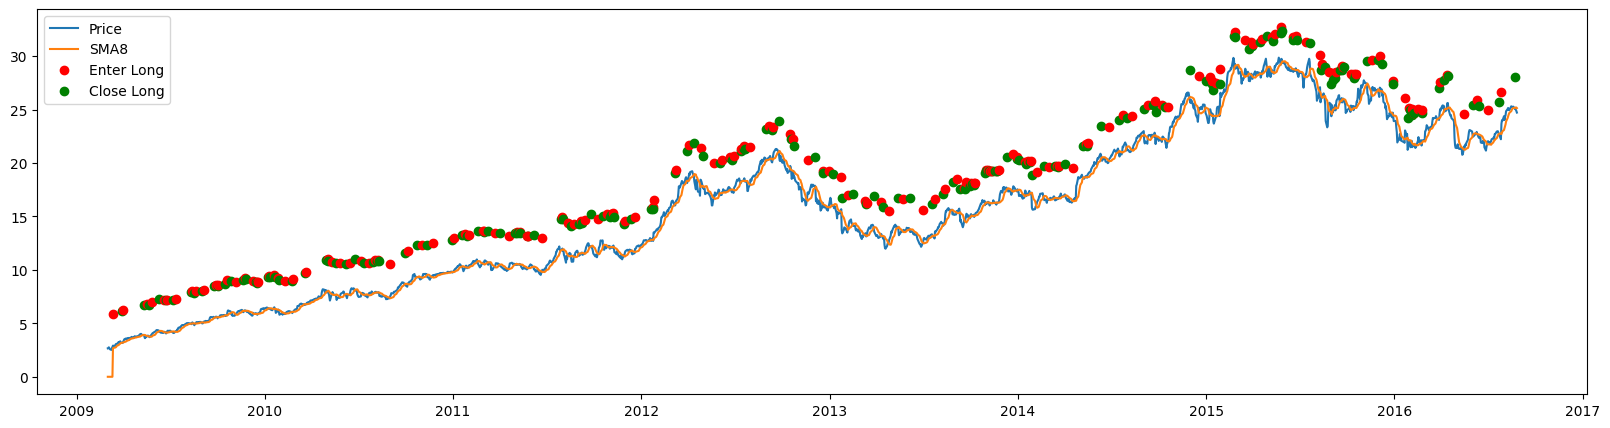

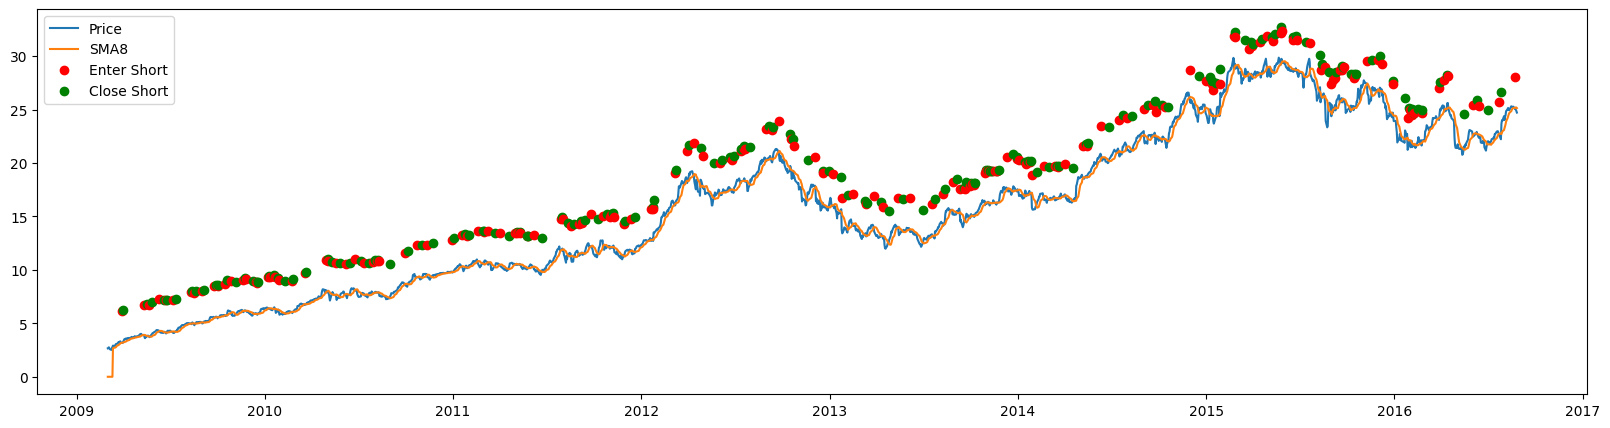

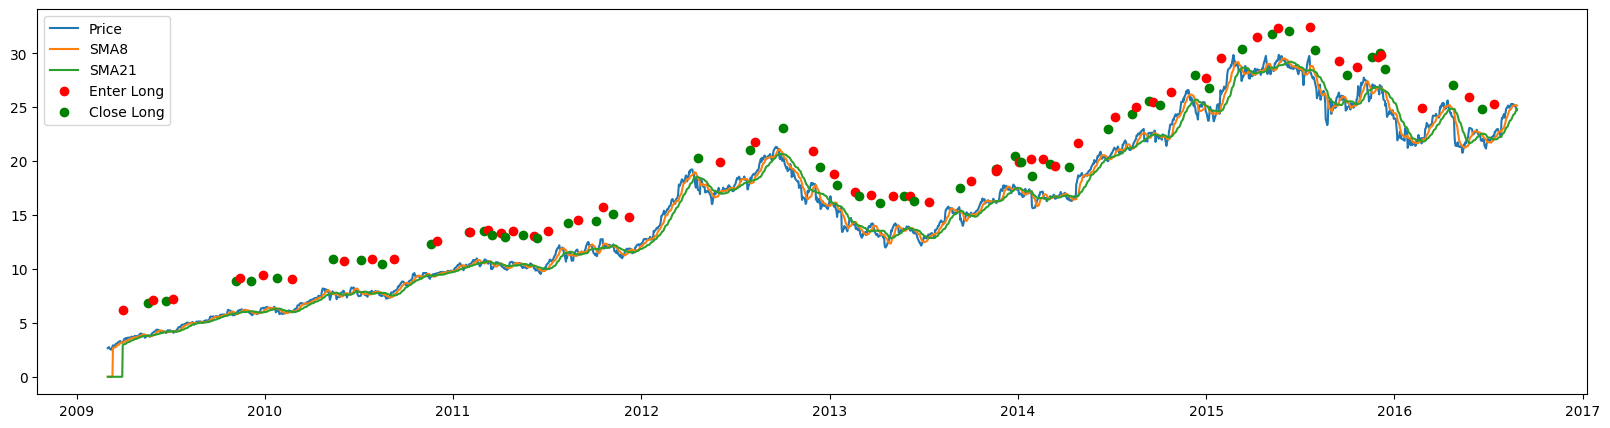

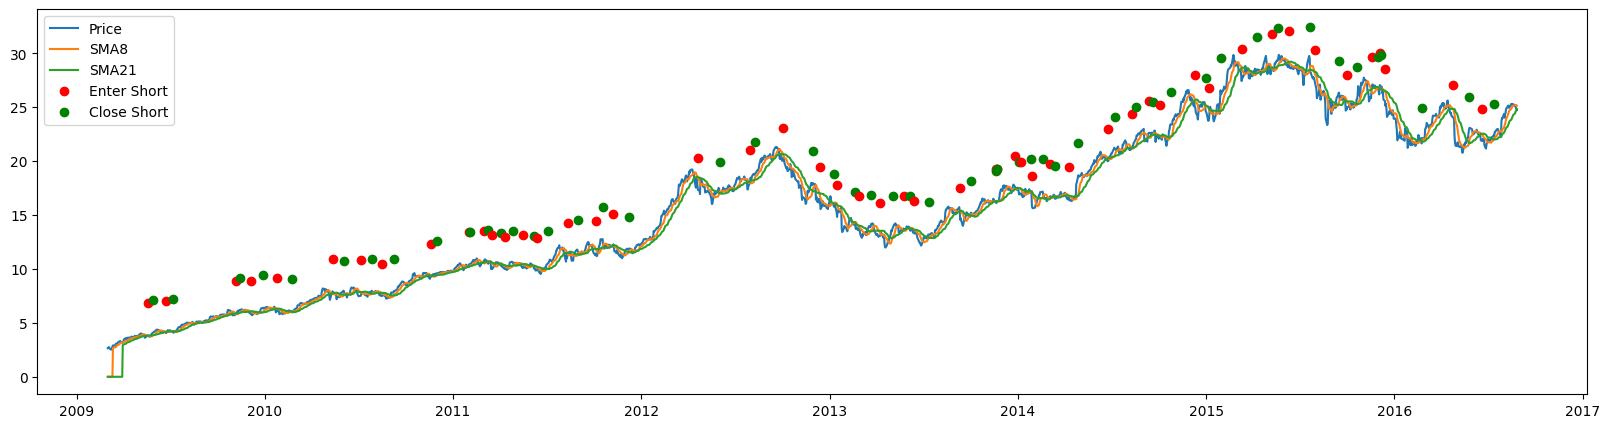

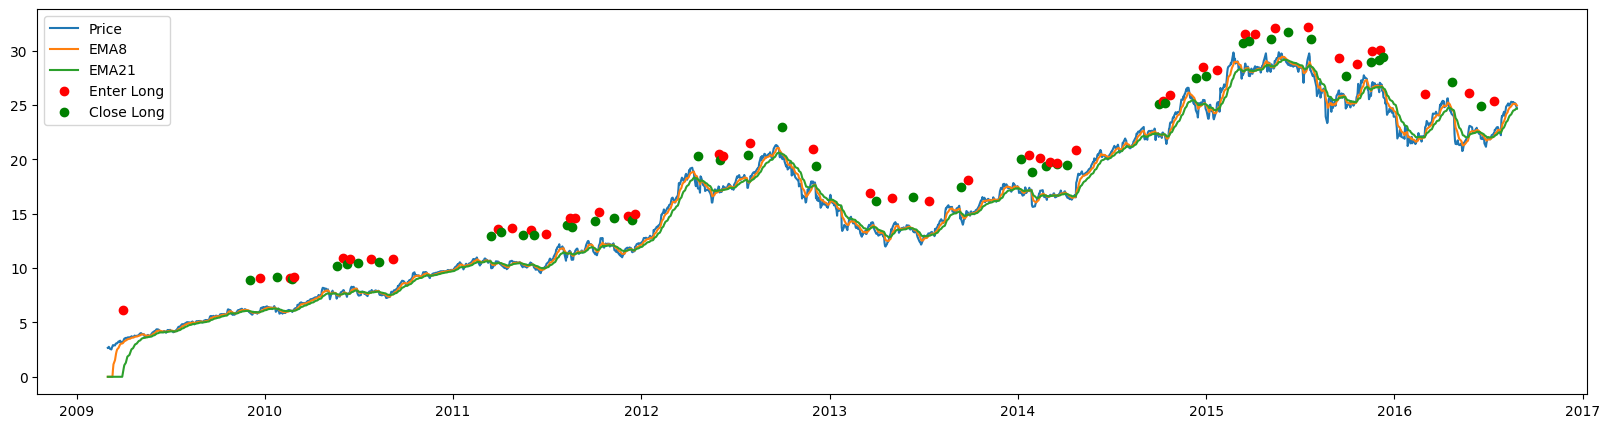

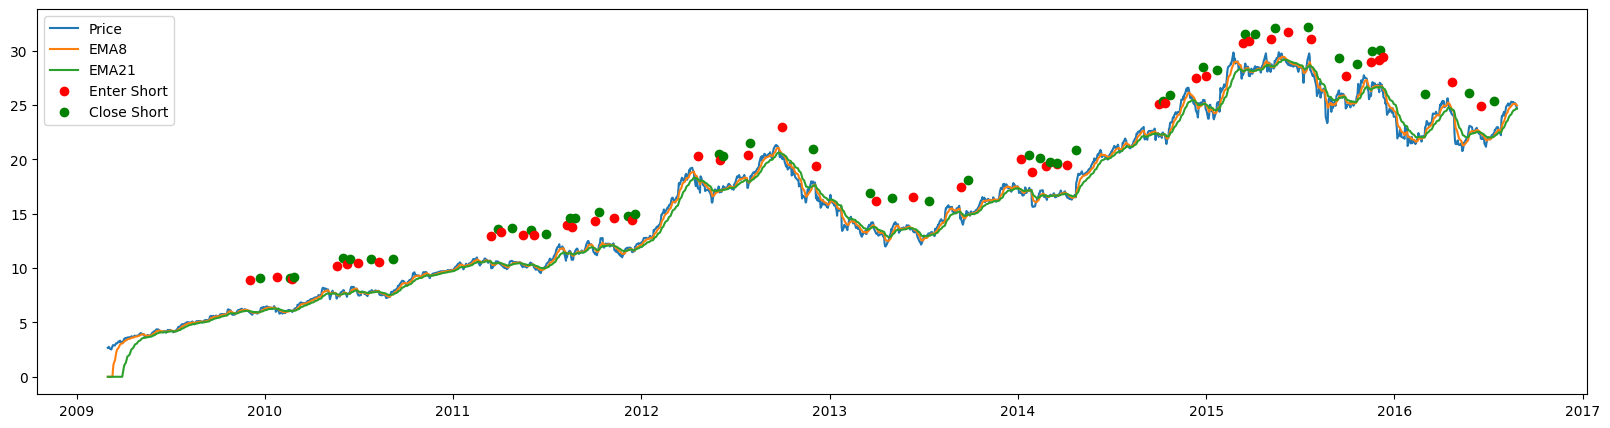

In [76]:
half = aapl_df.iloc[[i for i in range(len(aapl_df)//2)],:]
height = 3

# Long Strategy1 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long1'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long1'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy1 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short1'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short1'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy2 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long2'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long2'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy2 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short2'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short2'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy3 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long3'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long3'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy3 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short3'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short3'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

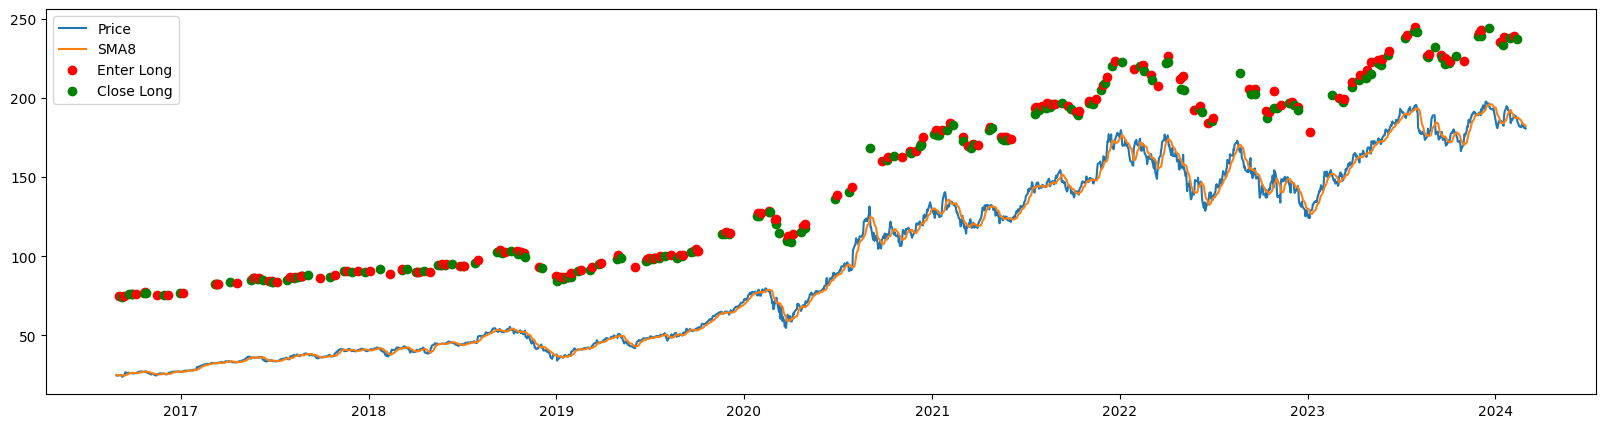

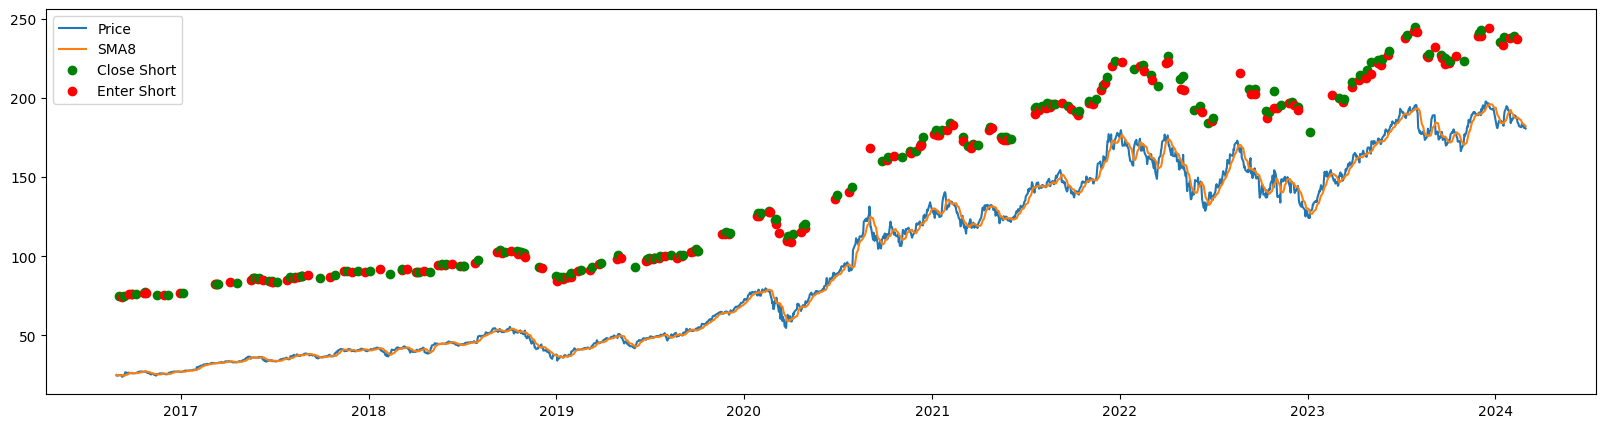

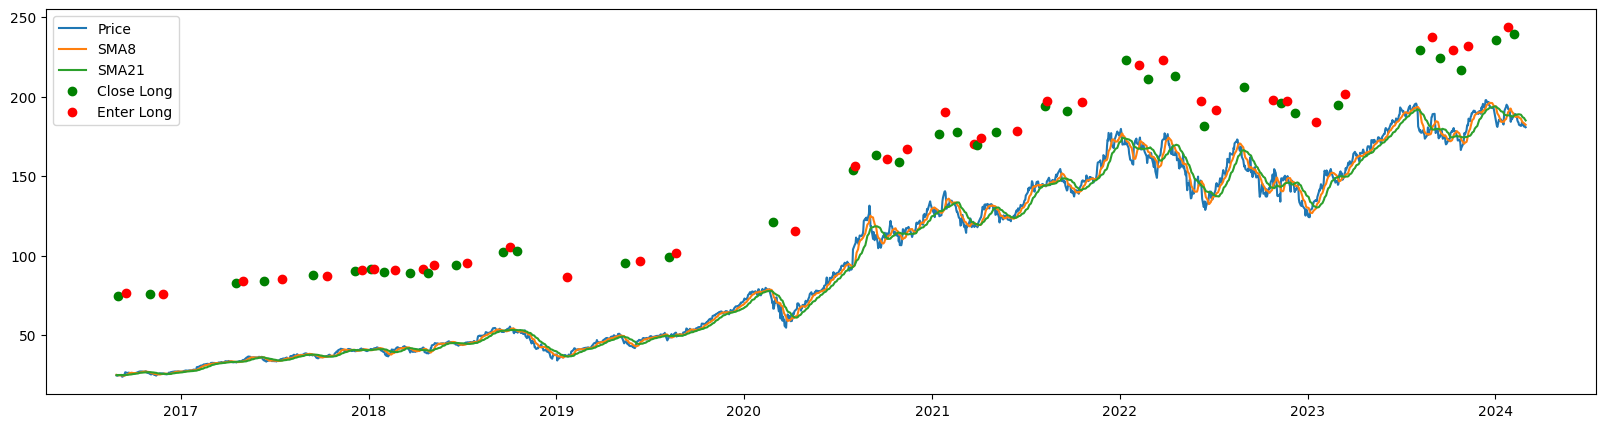

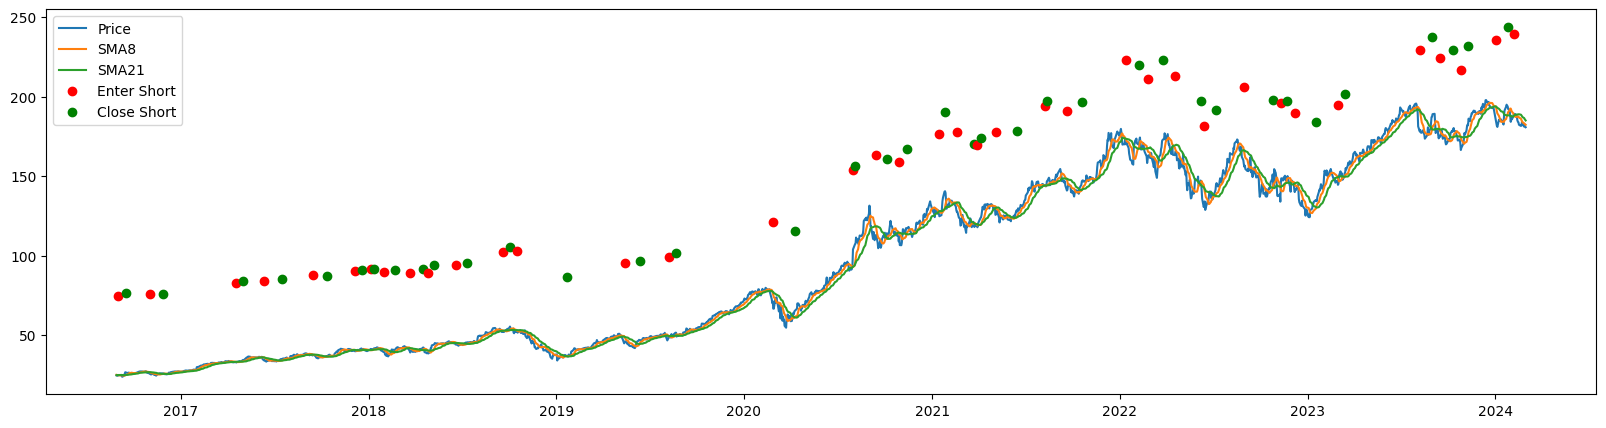

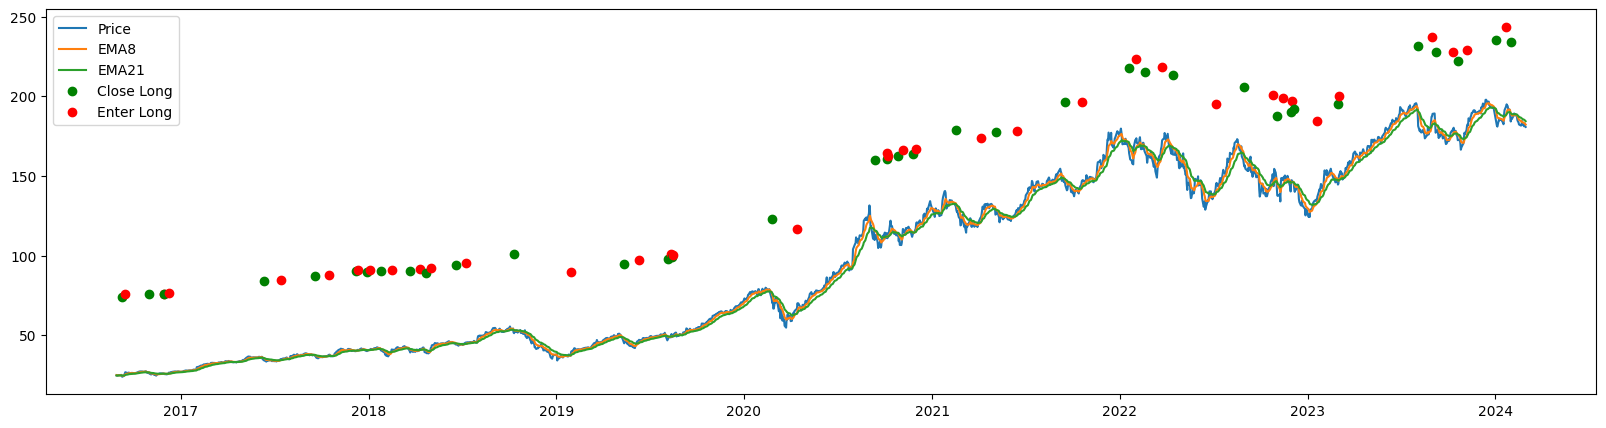

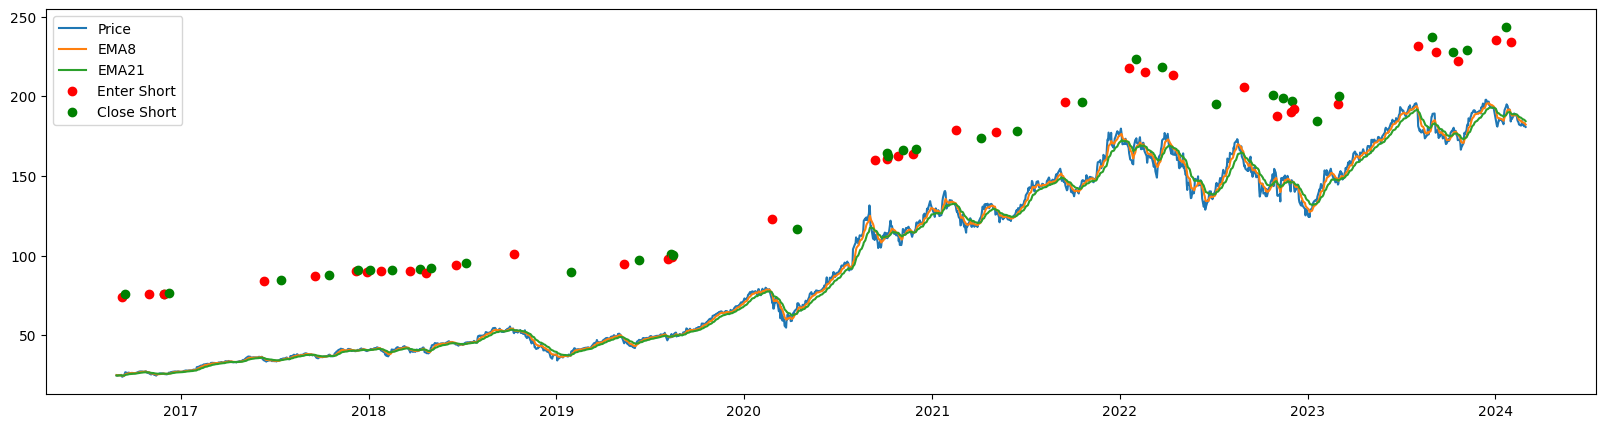

In [78]:
half = aapl_df.iloc[[i for i in range(len(aapl_df)//2, len(aapl_df))],:]
height = 50

# Long Strategy1 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long1'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long1'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy1 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short1'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short1'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy2 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long2'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long2'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy2 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short2'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short2'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy3 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long3'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long3'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy3 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short3'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short3'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# AMZN

In [82]:
amzn = yf.download('AMZN','2009-03-01','2024-03-01')
amzn_price = amzn['Adj Close']
amzn_price

[*********************100%%**********************]  1 of 1 completed


Date
2009-03-02      3.099500
2009-03-03      3.085000
2009-03-04      3.240500
2009-03-05      3.238500
2009-03-06      3.084500
                 ...    
2024-02-23    174.990005
2024-02-26    174.729996
2024-02-27    173.539993
2024-02-28    173.160004
2024-02-29    176.759995
Name: Adj Close, Length: 3776, dtype: float64

In [83]:
amzn_df = strategies(amzn_price)
amzn_df


Strategy #1

Sharpe Ratio:  -0.9122130878192813
Cumulative Return:  0.41719742735072907
Buy and Hold Return:  56.02855230805265
Average Win:  0.04759445551147541
Average Loss:  -0.02161305126921721
Max Drawdown:  -0.927634424463522

Strategy #2

Sharpe Ratio:  -0.42349826837970383
Cumulative Return:  0.736498458765995
Buy and Hold Return:  56.02855230805265
Average Win:  0.07657303626238995
Average Loss:  -0.0516751062254086
Max Drawdown:  -0.888109548823687

Strategy #3

Sharpe Ratio:  -0.2915762533228036
Cumulative Return:  1.8739132889918457
Buy and Hold Return:  56.02855230805265
Average Win:  0.11639340376098578
Average Loss:  -0.04128307056190265
Max Drawdown:  -0.4436405049403135


Stock        SMA8       SMA21        EMA8       EMA21 Long1  \
Date                                                                           
2009-03-02    3.099500    0.000000    0.000000    0.000000    0.000000  None   
2009-03-03    3.085000    0.000000    0.000000    0.000000    0.000000  None   
2009-03-04    3.240500    0.000000    0.000000    0.000000    0.000000  None   
2009-03-05    3.238500    0.000000    0.000000    0.000000    0.000000  None   
2009-03-06    3.084500    0.000000    0.000000    0.000000    0.000000  None   
...                ...         ...         ...         ...         ...   ...   
2024-02-23  174.990005  170.189999  166.480474  171.246243  167.235968  None   
2024-02-26  174.729996  170.521250  167.343331  172.020411  167.917243  None   
2024-02-27  173.539993  171.282499  168.151903  172.358096  168.428402  None   
2024-02-28  173.160004  171.602499  168.838569  172.536297  168.858548  None   
2024-02-29  176.759995  172.022499  169.405236  173.474897  169.576861  None   

           Short1 Long2 Short2 Long3 Short3  
Date                                         
2009-03-02   None  None   None  None   None  
2009-03-03   None  None   None  None   None  
2009-03-04   None  None   None  None   None  
2009-03-05   None  None   None  None   None  
2009-03-06   None  None   None  None   None  
...           ...   ...    ...   ...    ...  
2024-02-23   None  None   None  None   None  
2024-02-26   None  None   None  None   None  
2024-02-27   None  None   None  None   None  
2024-02-28   None  None   None  None   None  
2024-02-29   None  None   None  None   None  

[3776 rows x 11 columns]

# AMZN Graphs

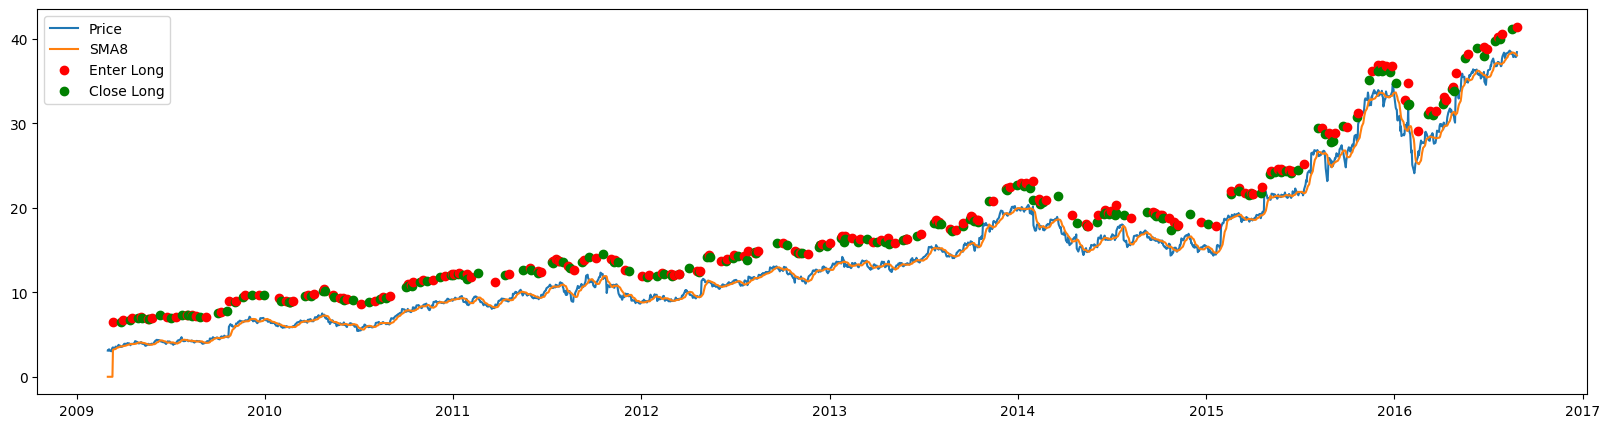

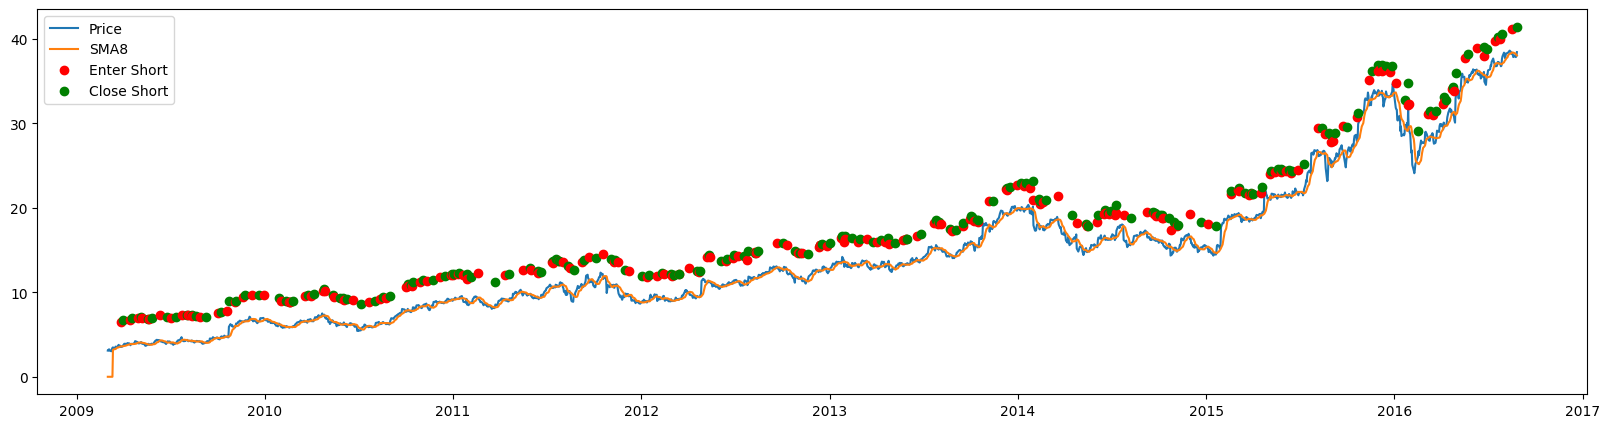

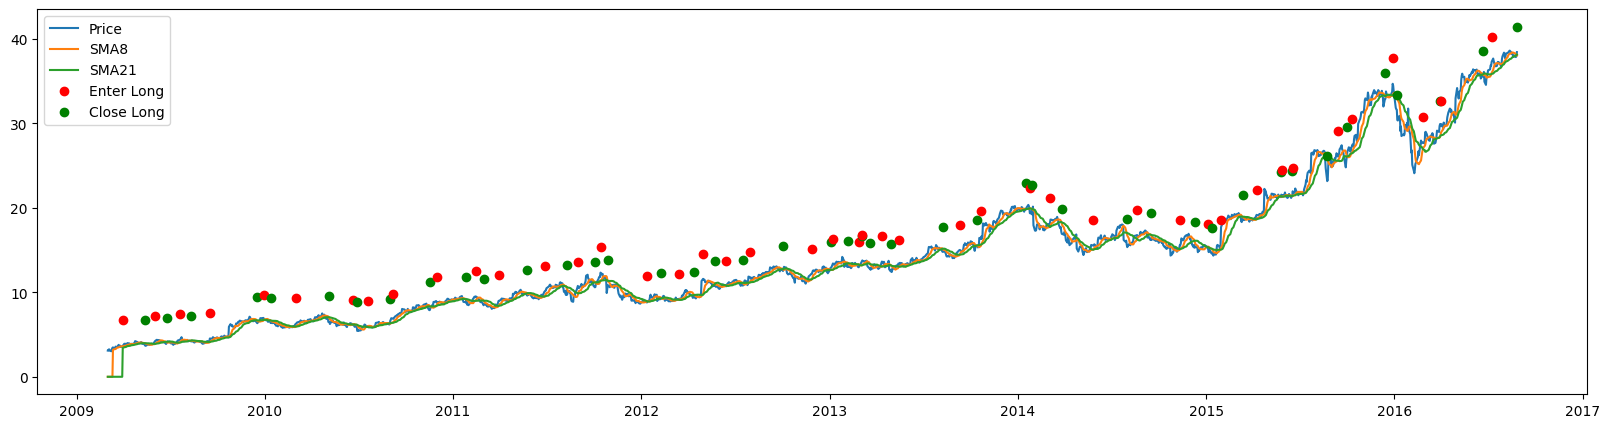

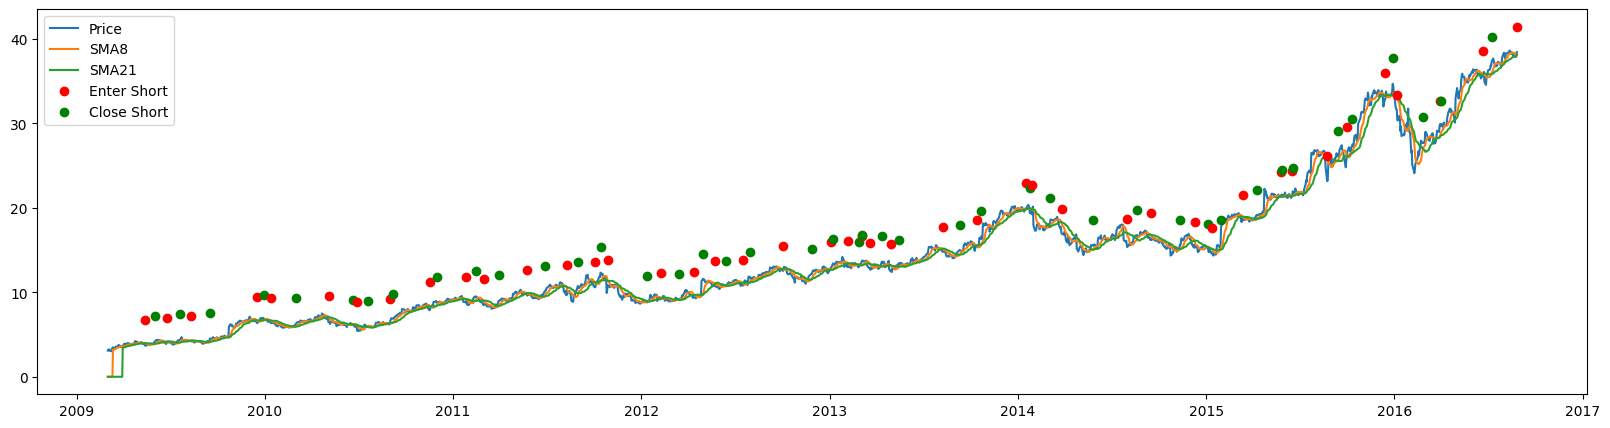

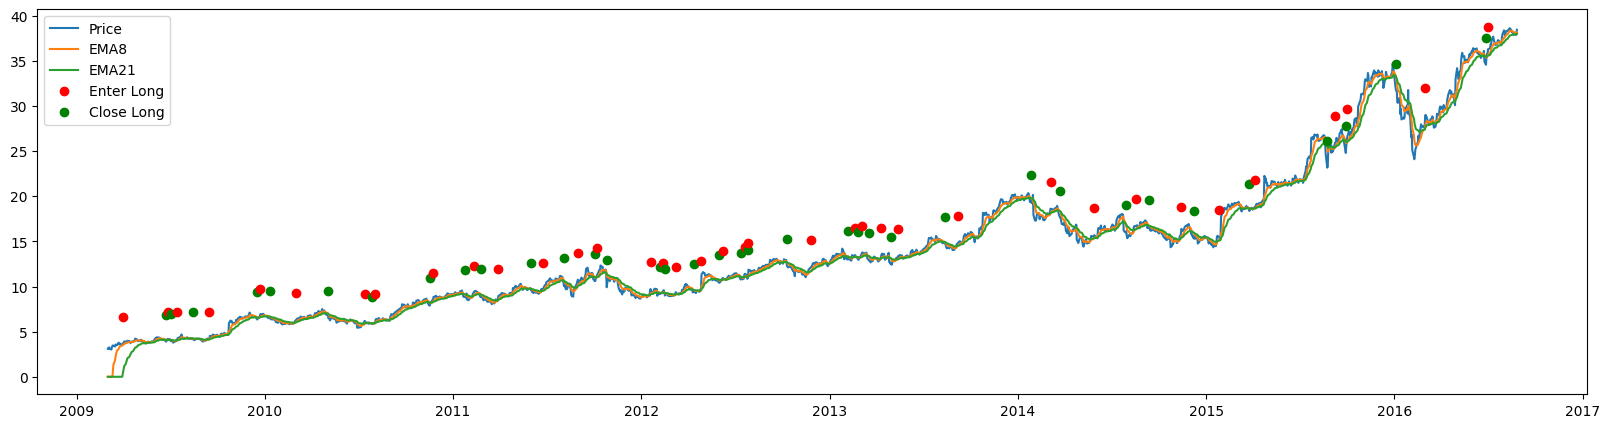

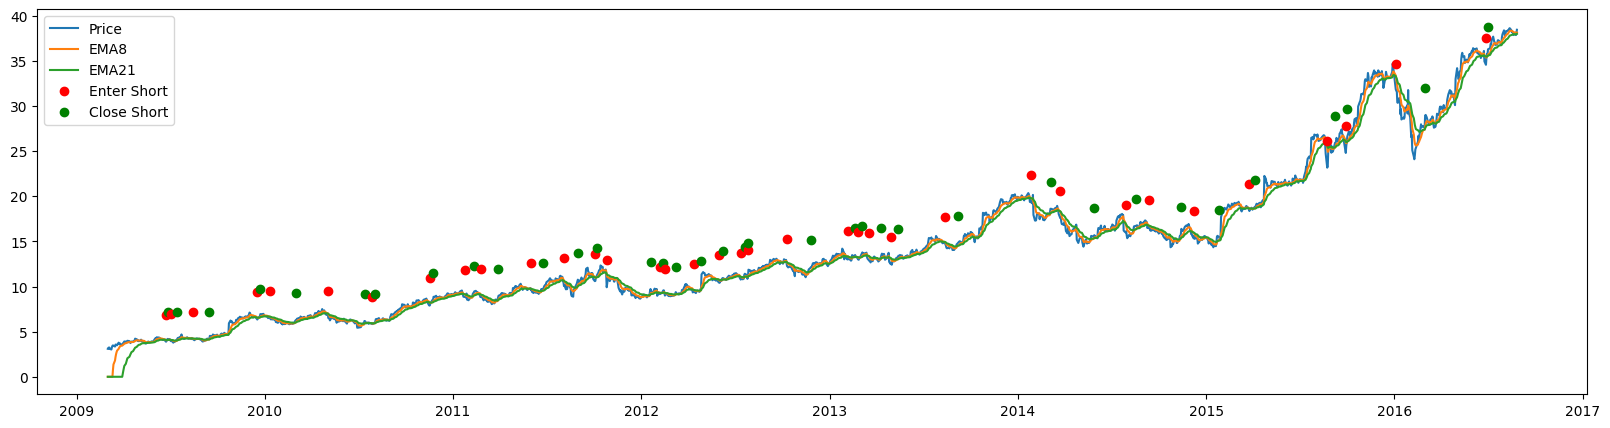

In [84]:
half = amzn_df.iloc[[i for i in range(len(amzn_df)//2)],:]
height = 3

# Long Strategy1 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long1'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long1'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy1 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short1'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short1'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy2 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long2'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long2'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy2 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short2'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short2'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy3 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long3'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long3'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy3 1/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short3'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short3'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

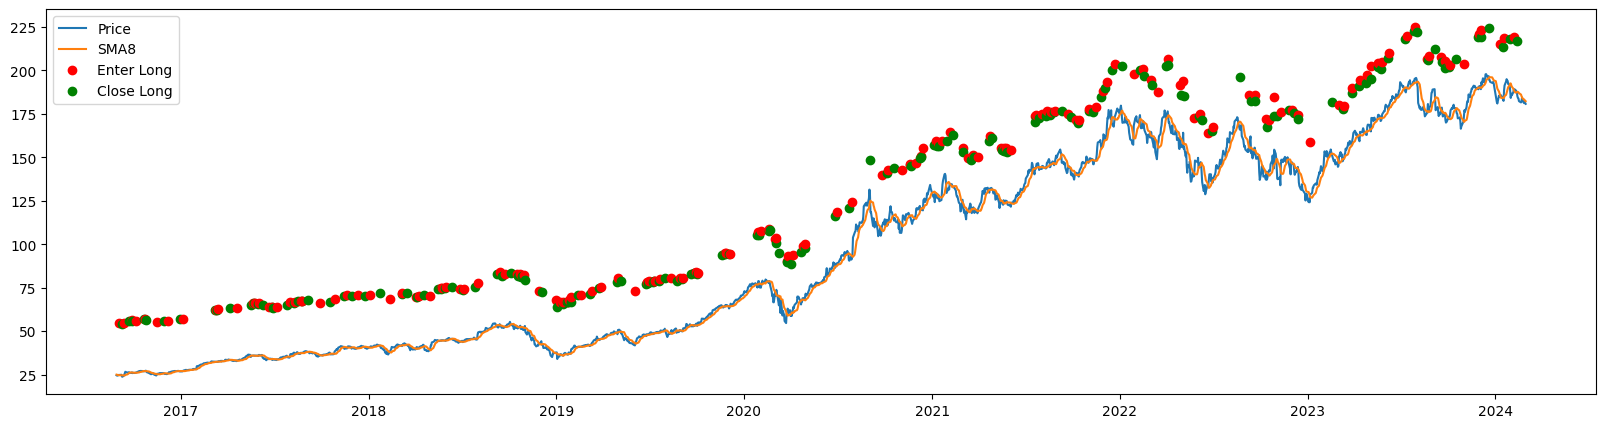

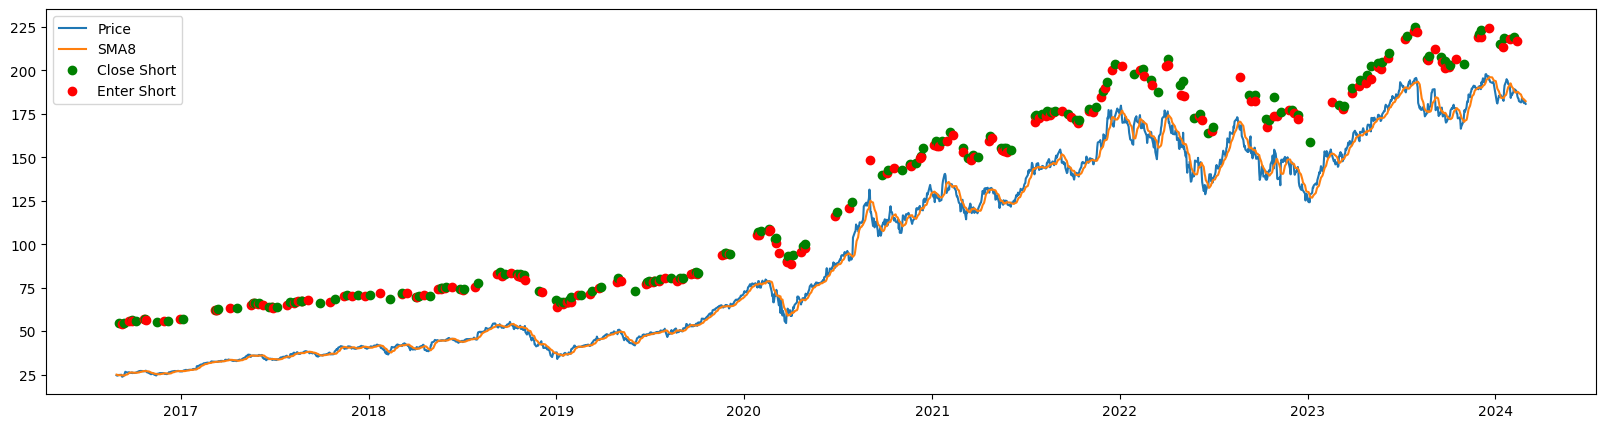

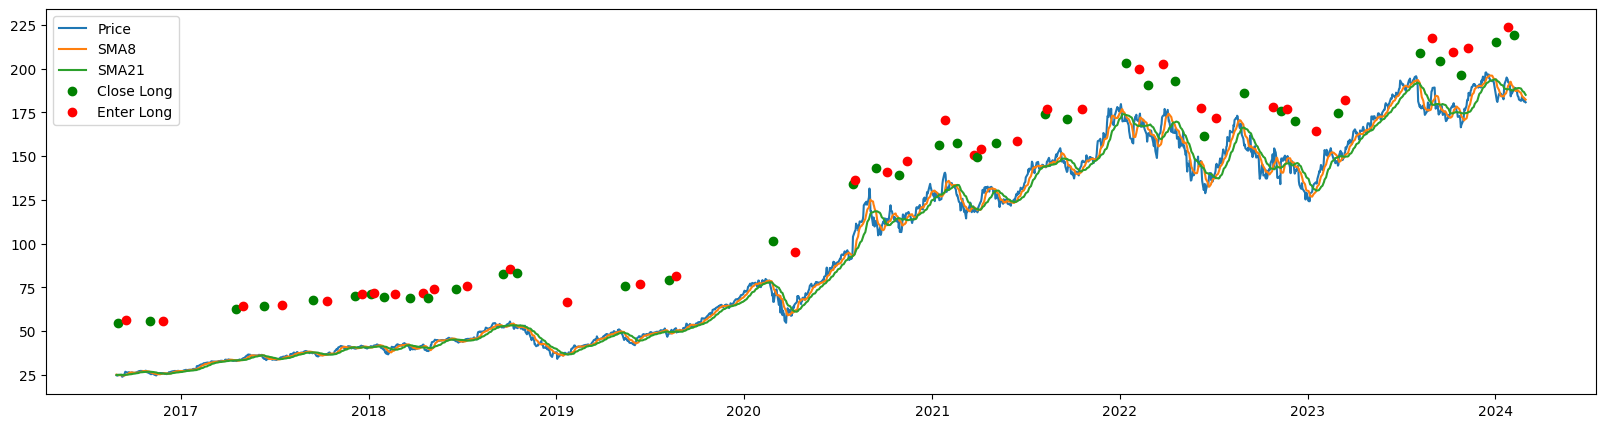

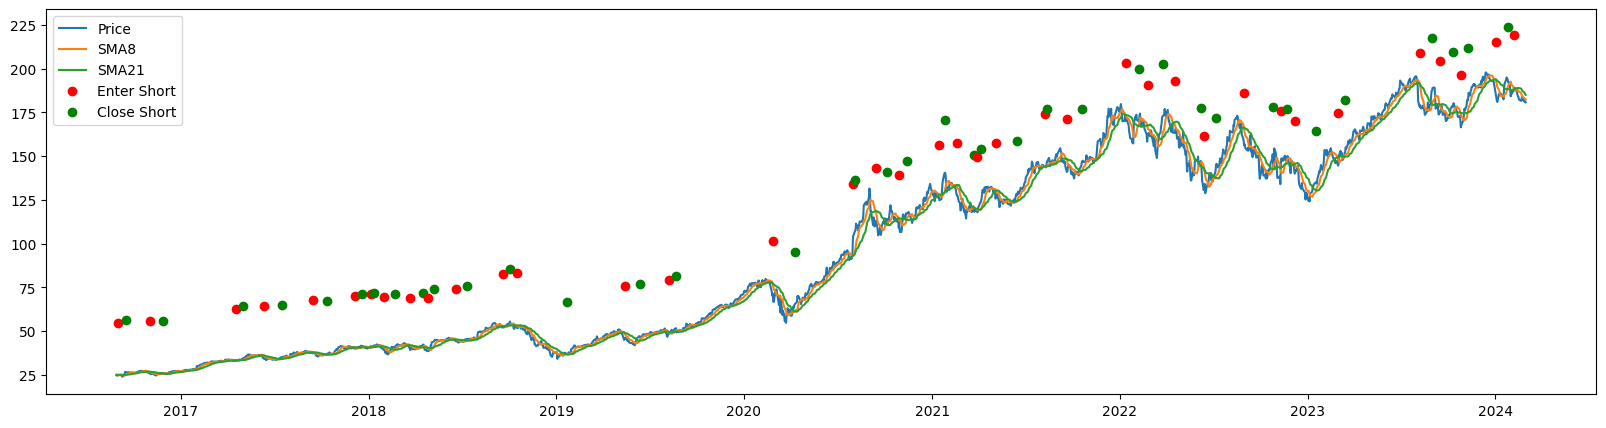

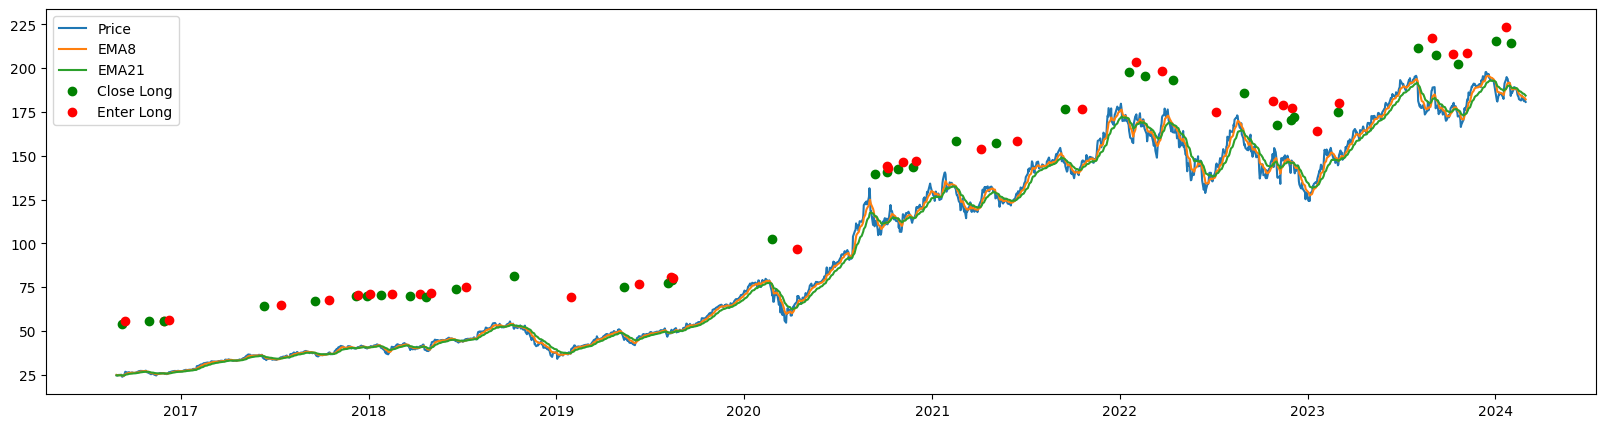

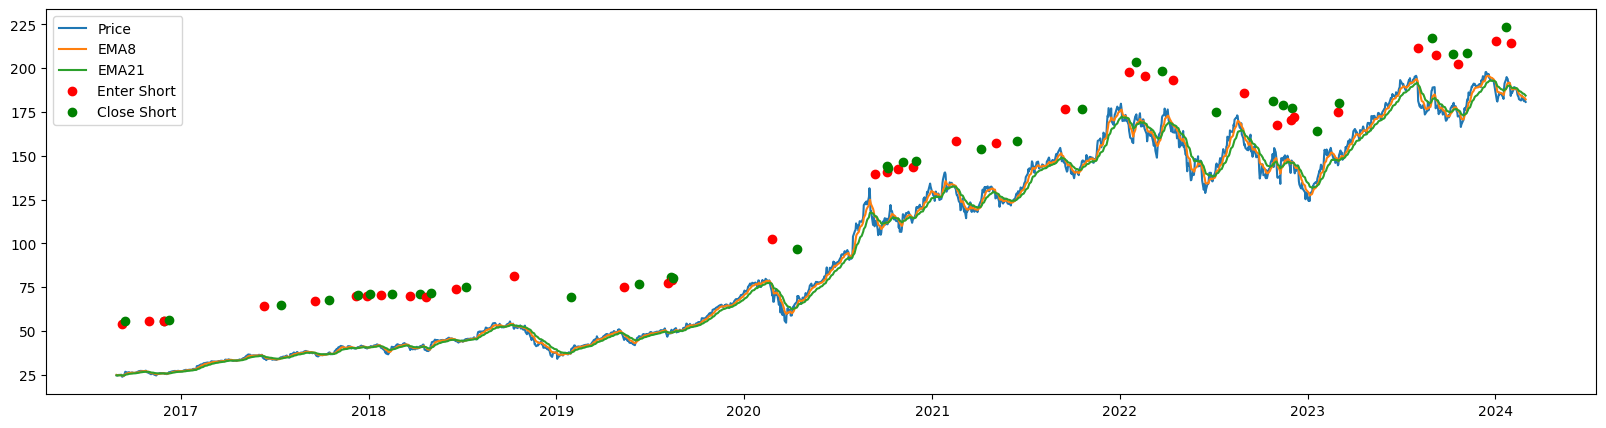

In [87]:
half = aapl_df.iloc[[i for i in range(len(amzn_df)//2, len(amzn_df))],:]
height = 30

# Long Strategy1 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long1'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long1'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy1 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short1'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short1'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy2 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long2'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long2'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy2 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['SMA8'], label='SMA8')
plt.plot(half.index, half['SMA21'], label='SMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short2'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short2'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Long Strategy3 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Long3'] == 'EnterLong':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Long')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Long3'] == 'CloseLong':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Long')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()

# Short Strategy3 2/2
plt.figure(figsize=(20,5))

plt.plot(half.index, half['Stock'], label='Price')
plt.plot(half.index, half['EMA8'], label='EMA8')
plt.plot(half.index, half['EMA21'], label='EMA21')
first_enter, first_close = True, True
for index, row in half.iterrows():
  if row['Short3'] == 'EnterShort':
    if first_enter:
      plt.plot(index, row['Stock']+height, 'ro', label='Enter Short')
      first_enter = False
    else:
      plt.plot(index, row['Stock']+height, 'ro')

  if row['Short3'] == 'CloseShort':
    if first_close:
      plt.plot(index, row['Stock']+height, 'go', label='Close Short')
      first_close = False
    else:
      plt.plot(index, row['Stock']+height, 'go')
plt.legend()